# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from functools import reduce
import matplotlib
from past.builtins import xrange

In [2]:
prefix = 'E:/ML Fire/EPRI-Data/EPRI_OG/'
plot   = 'Plots/'
sys_plot = os.path.join(prefix, plot)

# Import EPRI Data

In [3]:
EPRI = 'EPRI.xlsx'

# Extracting Data-frames 
df_FES = pd.read_excel(EPRI, sheet_name = 'Fire Event Summaries')
df_FEA = pd.read_excel(EPRI, sheet_name = 'Fire Event Attributes')
df_FSE = pd.read_excel(EPRI, sheet_name = 'Fire Severity Evaluation')
df_FTS = pd.read_excel(EPRI, sheet_name = 'Fire Timeline and Suppression')
df_PR  = pd.read_excel(EPRI, sheet_name = 'Plant Response')

df_epri = [df_FES, df_FEA, df_FSE, df_FTS, df_PR]

In [4]:
# Set FireID as index

df_FES.set_index('FireID',inplace=True)
df_FEA.set_index('FireID',inplace=True)
df_FSE.set_index('FireID',inplace=True)
df_FTS.set_index('FireID',inplace=True)
df_PR.set_index('FireID', inplace=True)

# Merge Dataframes

In [5]:
 df_epri_merge = reduce(lambda x,y: pd.merge(x,y, on='FireID', how='outer', sort = True), df_epri)

In [6]:
print(df_epri_merge.columns)
print(df_epri_merge.shape)

Index(['Event Date_FES', 'Disposition_FES', 'Outside PA', 'Plant Area',
       'Building', 'System', 'Component Group', 'Component', 'Voltage',
       'Current Type', 'Event Date_FEA', 'Disposition_FEA', 'Fire Cause',
       'Combustible Group', 'Type', 'Form', 'Fire Type', 'Smoke',
       'Temperature', 'Damage Extent', 'Collateral Damage', 'Event Date_FSE',
       'Disposition_FSE', 'Review Status:', 'Automatic Determination',
       'Unnamed: 5', 'Unnamed: 6', 'Event Date_FTS', 'Disposition_FTS',
       'Ignition', 'Discovery', 'Duration Certainty', 'Duration',
       'Detection Method', 'Detection Performance', 'Suppression Method',
       'Suppression Agent', 'Unnamed: 11', 'Unnamed: 12', 'Event Date_PR',
       'Disposition_PR', 'Mode Prior', 'Mode After', 'Power Level Prior',
       'Power Level After', 'Power Effect', 'EAL Declaration'],
      dtype='object')
(2205, 47)


# Data Cleanup

**Disposition - Fire Event Summary**

In [7]:
dip_fes = df_epri_merge.Disposition_FES.unique()
print(dip_fes)

['Undetermined' 'Not Challenging' 'Challenging' nan 'Not Evaluated'
 'Potentially Challenging' 'Undetermined (NC‐PC) ' 'Undetermined (PC‐CH)'
 'Undetermined (NC‐PC)' 'Not Challenging ' 'Potentially Challenging '
 ' Not\xa0Challenging' 'Not\xa0Challenging' 'Potentially\xa0Challenging'
 'Undetermined\xa0(NC‐PC)' 'Undetermined\xa0(PC‐CH)'
 ' Undetermined\xa0(PC‐CH)' ' Challenging' ' Undetermined\xa0(NC‐PC)'
 ' Potentially\xa0Challenging' 'Undetermined(NC‐PC)'
 'Undetermined (PC-CH)' 'Not+D20421:D20432Challenging']


In [249]:
df_epri_merge['Disposition'].shape

(2205,)

In [8]:
df_epri_merge['Disposition_FES'] = df_epri_merge['Disposition_FES'].replace(['Potentially\xa0Challenging', ' Potentially\xa0Challenging', 'Potentailly Challenging ',
                                                      ' Not\xa0Challenging', 'Not\xa0Challenging',
                                                       'Undetermined\xa0(NC‐PC)', 'Undetermined\xa0(PC‐CH)', ' Undetermined\xa0(PC‐CH)', ' Undetermined\xa0(NC‐PC)',
                                                      'Undetermined(NC‐PC)', 'Not+D20421:D20432Challenging', ' Challenging', 'Undetermined (NC‐PC) ', 'Undetermined (PC-CH)',
                                                                            'Not Challenging ', 'Potentially Challenging '],
                                                      ['Potentially Challenging', 'Potentially Challenging', 'Potentially Challenging',
                                                      'Not Challenging', 'Not Challenging', 
                                                      'Undetermined (NC‐PC)', 'Undetermined (PC‐CH)', 'Undetermined (PC‐CH)', 'Undetermined (NC‐PC)',
                                                      'Undetermined (NC‐PC)', 'Not Challenging', 'Challenging', 'Undetermined (NC‐PC)', 'Undetermined (PC‐CH)',
                                                      'Not Challenging', 'Potentially Challenging'])

In [9]:
df_epri_merge.Disposition_FES.unique()

array(['Undetermined', 'Not Challenging', 'Challenging', nan,
       'Not Evaluated', 'Potentially Challenging', 'Undetermined (NC‐PC)',
       'Undetermined (PC‐CH)'], dtype=object)

**Disposition - Fire Event Attributes**

In [10]:
dip_fea = df_epri_merge.Disposition_FEA.unique()
print(dip_fea)

['Undetermined' 'Not Challenging' 'Challenging' nan 'Not Evaluated'
 'Potentially Challenging' 'Undetermined (NC‐PC)' 'Undetermined (PC‐CH)'
 'otentially Challenging' 'Undetermined (PC‐CH）' 'Undetermined (PC-CH）'
 'Undetermined(NC‐PC)' 'NotChallenging' 'Undetermined(PC‐CH)'
 'PotentiallyChallenging' 'Undetermined(NC‐PC' ': Not Challenging'
 'Undetermined (NC‐PC) FireID: 10614' 'Unknown' 'Undetermined (NC‐PC'
 'Undetermined (PC‐CH' 'Other electrical or electronic equipment'
 'Not Challengin']


In [11]:
df_epri_merge['Disposition_FEA'] = df_epri_merge['Disposition_FEA'].replace(['Undetermined\xa0(NC‐PC)', 'Undetermined\xa0(PC‐CH) ', 'Undetermined\xa0(NC‐PC) ',
                                                       'Undetermined\xa0(PC‐CH)', 'Potentially\xa0Challenging', 
                                                       'Not\xa0Evaluated ', 'Not\xa0Evaluated', 'Potentially\xa0Challenging ',
                                                                 ': Not Challenging', 'Undetermined (NC‐PC) FireID: 10614',
                                                                'NotChallenging', 'otentially Challenging', 'PotentiallyChallenging',
                                                                'Not Challengin', 'Undetermined (PC‐CH', 'Undetermined(NC‐PC',
                                                                'Undetermined (PC-CH）', 'Undetermined (PC‐CH）', 'Undetermined(NC‐PC)', 'Undetermined(PC‐CH)'],
                                                      ['Undetermined (NC‐PC)', 'Undetermined (PC‐CH)', 'Undetermined (NC‐PC)',
                                                       'Undetermined (PC‐CH)', 'Potentailly Challenging',
                                                      'Not Evaluated', 'Not Evaluated', 'Potentailly Challenging',
                                                      'Not Challenging', 'Undetermined (NC‐PC)',
                                                      'Not Challenging', 'Potentially Challenging', 'Potentially Challenging',
                                                      'Not Challenging', 'Undetermined (PC‐CH)','Undetermined (NC‐PC)',
                                                      'Undetermined (PC‐CH)', 'Undetermined (PC‐CH)', 'Undetermined (NC‐PC)', 'Undetermined (PC‐CH)'])

In [12]:
df_epri_merge.Disposition_FEA.unique()

array(['Undetermined', 'Not Challenging', 'Challenging', nan,
       'Not Evaluated', 'Potentially Challenging', 'Undetermined (NC‐PC)',
       'Undetermined (PC‐CH)', 'Unknown', 'Undetermined (NC‐PC',
       'Other electrical or electronic equipment'], dtype=object)

**Disposition - Fire Severity Evaluation**

In [13]:
disp_fsebf = df_epri_merge.Disposition_FSE.unique()
disp_fsebf

array(['Undetermined', 'Not Challenging', 'Challenging', nan,
       'Not Evaluated', 'Potentially Challenging', 'Undetermined (NC‐PC)',
       'Undetermined (PC‐CH)', 'Preliminary', 'Undetermined\xa0(NC‐PC)',
       'Undetermined\xa0(PC‐CH) ', 'Undetermined\xa0(NC‐PC) ',
       'Undetermined\xa0(PC‐CH)', 'Potentially\xa0Challenging',
       'Not\xa0Evaluated ', 'Not\xa0Evaluated',
       'Potentially\xa0Challenging '], dtype=object)

In [14]:
df_epri_merge['Disposition_FSE'] = df_epri_merge['Disposition_FSE'].replace(['Undetermined\xa0(NC‐PC)', 'Undetermined\xa0(PC‐CH) ',
                                                               'Undetermined\xa0(NC‐PC) ', 'Undetermined\xa0(PC‐CH)',
                                                               'Potentially\xa0Challenging', 'Not\xa0Evaluated ', 'Not\xa0Evaluated',
                                                               'Potentially\xa0Challenging '],
                                                      ['Undetermined (NC‐PC)', 'Undetermined (PC‐CH)',
                                                      'Undetermined (NC‐PC)', 'Undetermined (PC‐CH)',
                                                      'Potentially Challenging', 'Not Evaluated', 'Not Evaluated',
                                                      'Potentially Challenging'])

In [15]:
df_epri_merge.Disposition_FSE.unique()

array(['Undetermined', 'Not Challenging', 'Challenging', nan,
       'Not Evaluated', 'Potentially Challenging', 'Undetermined (NC‐PC)',
       'Undetermined (PC‐CH)', 'Preliminary'], dtype=object)

**Disposition - Fire Timeline and Supression**

In [16]:
disp_ftsbf = df_epri_merge.Disposition_FTS.unique()
disp_ftsbf

array(['Undetermined', 'Not\xa0Challenging', 'Challenging', nan,
       'Not\xa0Evaluated', 'Potentially\xa0Challenging',
       'Undetermined\xa0(NC‐PC)', 'Undetermined\xa0(PC‐CH)',
       'Challenging ', 'Undetermined\xa0(NC‐PC) ', 'Not\xa0Challenging ',
       'Potentially\xa0Challenging ', 'Not Challenging',
       'Potentially Challenging', 'Undetermined (NC‐PC)',
       'Undetermined (PC‐CH)',
       'Other plant personnel (in vicinity or passerby)', 'Not Evaluated'],
      dtype=object)

In [17]:
df_epri_merge['Disposition_FTS'] = df_epri_merge['Disposition_FTS'].replace(['Not\xa0Challenging', 'Not\xa0Evaluated', 'Potentially\xa0Challenging',
                                                              'Undetermined\xa0(NC‐PC)', 'Undetermined\xa0(PC‐CH)', 'Undetermined\xa0(NC‐PC) ',
                                                              'Not\xa0Challenging ', 'Potentially\xa0Challenging '],
                                                              ['Not Challenging', 'Not Evaluated', 'Potentially Challenging',
                                                              'Undetermined (NC‐PC)', 'Undetermined (PC‐CH)', 'Undetermined (NC‐PC)',
                                                              'Not Challenging', 'Potentially Challenging'])

In [19]:
df_epri_merge.Disposition_FTS.unique()

array(['Undetermined', 'Not Challenging', 'Challenging', nan,
       'Not Evaluated', 'Potentially Challenging', 'Undetermined (NC‐PC)',
       'Undetermined (PC‐CH)', 'Challenging ',
       'Other plant personnel (in vicinity or passerby)'], dtype=object)

**Disposition - Plant Records**

In [20]:
disp_prbf = df_epri_merge.Disposition_PR.unique()
disp_prbf

array(['Undetermined', 'Not Challenging', 'Challenging', nan,
       'Not Evaluated', 'Potentially Challenging', 'Undetermined (NC‐PC)',
       'Undetermined (PC‐CH)', 'Unusual Event', 'Cold Shutdown',
       'Not Challenging ', 'Undetermined\xa0(PC‐CH) ',
       ' Potentially\xa0Challenging ', 'Not\xa0Challenging',
       ' Undetermined\xa0(NC‐PC)', 'Potentially\xa0Challenging',
       ' Not\xa0Challenging ', 'Not\xa0Challenging ',
       'Potentially\xa0Challenging ', 'Undetermined\xa0(NC‐PC) ',
       'Undetermined\xa0(PC‐CH)', ' Potentially\xa0Challenging',
       'Undetermined\xa0(NC‐PC)', 'Challenging ', ' Not\xa0Challenging',
       ' Challenging', '9/7/2006 ', ' Undetermined\xa0(PC‐CH)',
       ': Potentially\xa0Challenging', ' Undetermined\xa0(NC‐PC) ',
       ': Not\xa0Challenging ', ' Challenging ', ' Not Challenging',
       ' Undetermined (NC‐PC)', 'Refueling', 'Undetermined (NC‐PC',
       ': Undetermined (NC‐PC)', ': Undetermined (PC‐CH)',
       'Undetermined (NC‐PC) R'

In [21]:
df_epri_merge['Disposition_PR'] = df_epri_merge['Disposition_PR'].replace(['Undetermined\xa0(PC‐CH) ', ' Potentially\xa0Challenging ',
                                                            'Not\xa0Challenging', ' Undetermined\xa0(NC‐PC)', 'Potentially\xa0Challenging',
                                                            ' Not\xa0Challenging ', 'Not\xa0Challenging ',
                                                            'Potentially\xa0Challenging ', 'Undetermined\xa0(NC‐PC) ',
                                                             'Undetermined\xa0(PC‐CH)', ' Potentially\xa0Challenging',
                                                             'Undetermined\xa0(NC‐PC)', 'Challenging ', ' Not\xa0Challenging',
                                                            ' Challenging', ' Undetermined\xa0(PC‐CH)',
                                                            ': Potentially\xa0Challenging', ' Undetermined\xa0(NC‐PC) ',
                                                            ': Not\xa0Challenging ', ' Challenging ', ' Not Challenging',
                                                            ': Undetermined (NC‐PC)', ': Undetermined (PC‐CH)',
                                                            ' Undetermined (NC‐PC)', 'Undetermined (NC‐PC',
                                                            'Undetermined (NC‐PC) R', 'Not Challengin', ' Potentially Challenging',
                                                            'Not Challenging '],
                                                            ['Undetermined (PC‐CH)', 'Potentially Challenging',
                                                            'Not Challenging', 'Undetermined (NC‐PC)', 'Potentially Challenging',
                                                            'Not Challenging', 'Not Challenging',
                                                            'Potentially Challenging', 'Undetermined (NC‐PC)',
                                                            'Undetermined (PC‐CH)', 'Potentially Challenging',
                                                            'Undetermined (NC‐PC)', 'Challenging', 'Not Challenging',
                                                            'Challenging', 'Undetermined (PC‐CH)',
                                                            'Potentially Challenging', 'Undetermined (NC‐PC)',
                                                            'Not Challenging', 'Challenging', 'Not Challenging',
                                                            'Undetermined (NC‐PC)', 'Undetermined (PC‐CH)',
                                                            'Undetermined (NC‐PC)', 'Undetermined (NC‐PC)',
                                                            'Undetermined (NC‐PC)', 'Not Challenging', 'Potentially Challenging',
                                                            'Not Challenging'])

In [22]:
df_epri_merge.Disposition_PR.unique()

array(['Undetermined', 'Not Challenging', 'Challenging', nan,
       'Not Evaluated', 'Potentially Challenging', 'Undetermined (NC‐PC)',
       'Undetermined (PC‐CH)', 'Unusual Event', 'Cold Shutdown',
       '9/7/2006 ', 'Refueling', '10/11/1991'], dtype=object)

**Fire Type**

In [23]:
df_ftbf = df_epri_merge['Fire Type'].unique()
print(df_ftbf)

['Arc/electric discharge' 'Flaming combustion – external to component' nan
 'Smoldering combustion – internal to component'
 'Flaming combustion – internal to component' 'Explosion' 'Unknown'
 'laming combustion – external to component' 'Other (specify)'
 'Fire not observed and fire type indeterminate from post‐inspectio'
 'Overheating – no smoldering or flaming combustion'
 'No Fire\xa0‐\xa0False actuation of detection device'
 'Flamingcombustion–internaltocomponent'
 'Firenotobservedandfiretypeindeterminatefrompost‐inspectio'
 'Firenotobservedandfiretypeindeterminatefrompost‐inspectio\nFireTypeUnknown:'
 'Smolderingcombustion–internaltocomponent'
 'Flamingcombustion–externaltocomponent'
 'Overheating–nosmolderingorflamingcombustion'
 'Smolderingcombustion–externaltocomponent' 'Arc/electricdischarge'
 'NoFire‐Falseactuationofdetectiondevice' 'Other(specify)'
 'Mechanicalequipmentmalfunction/failure'
 'Flaming combustion – internal to componen'
 'Smoldering combustion – external to com

In [24]:
df_epri_merge['Fire Type'].value_counts()

Flaming combustion – external to component                                                        594
Smoldering combustion – internal to component                                                     217
Flaming combustion – internal to component                                                        213
Overheating – no smoldering or flaming combustion                                                 172
Flamingcombustion–externaltocomponent                                                             125
Arc/electric discharge                                                                             93
Smoldering combustion – external to component                                                      91
Other (specify)                                                                                    91
Flamingcombustion–internaltocomponent                                                              89
Overheating–nosmolderingorflamingcombustion                                       

In [25]:
df_epri_merge['Fire Type'] = df_epri_merge['Fire Type'].replace(['laming combustion – external to component', 
                                                     'Flamingcombustion–externaltocomponent',
                                                    ': Flaming combustion – external to component',
                                                    'Flaming combustion – external to component '], 'Flaming combustion – external to component') 

In [26]:
df_epri_merge['Fire Type'] = df_epri_merge['Fire Type'].replace(['Smolderingcombustion–internaltocomponent',
                                                    'Smoldering combustion – internal to componen'],
                                                    'Smoldering combustion – internal to component')

In [27]:
df_epri_merge['Fire Type'] = df_epri_merge['Fire Type'].replace(['Smolderingcombustion–externaltocomponent'],
                                                    'Smoldering combustion – external to component')

In [28]:
df_epri_merge['Fire Type'] = df_epri_merge['Fire Type'].replace(['Flamingcombustion–internaltocomponent',
                                                    'Flaming combustion – internal to componen',
                                                    ': Flaming combustion – internal to component'], 
                                                    'Flaming combustion – internal to component')

In [29]:
df_epri_merge['Fire Type'] = df_epri_merge['Fire Type'].replace(['Fire not observed and fire type indeterminate from post‐inspectio',
                                                    'Firenotobservedandfiretypeindeterminatefrompost‐inspectio',
                                                    'Firenotobservedandfiretypeindeterminatefrompost‐inspectio\nFireTypeUnknown:',
                                                    ' Fire not observed and fire type indeterminate from post‐inspectio',
                                                    'Fire not observed and fire type indeterminate from post‐inspectio\n'], 
                                                    'Fire not observed and fire type indeterminate from post‐inspection')

In [30]:
df_epri_merge['Fire Type'] = df_epri_merge['Fire Type'].replace(['Arc/electricdischarge',
                                                    ': Arc/electric discharge',
                                                    ' Arc/electric discharge'],
                                                   'Arc/electric discharge')

In [31]:
df_epri_merge['Fire Type'] = df_epri_merge['Fire Type'].replace(['No Fire\xa0‐\xa0False actuation of detection device',
                                                    'NoFire‐Falseactuationofdetectiondevice'],
                                                   'No Fire ‐ False actuation of detection device') 

In [32]:
df_epri_merge['Fire Type'] = df_epri_merge['Fire Type'].replace(['Overheating – no  or flaming combustion',
                                                    'Overheating–nosmolderingorflamingcombustion',
                                                    'verheating – no smoldering or flaming combustion'],
                                                    'Overheating – no smoldering or flaming combustion')

In [33]:
df_epri_merge['Fire Type'] = df_epri_merge['Fire Type'].replace(['Other(specify)',
                                                    'Other (specify', 'Mechanicalequipmentmalfunction/failure'],
                                                   ['Other (specify)', 
                                                    'Other (specify)', 'Mechanical equipment malfunction/failure'])

In [34]:
df_epri_merge['Fire Type'] = df_epri_merge['Fire Type'].replace(['Mechanical equipment malfunction/failure',
                                                     'Overheated Material (lube oil, pump packing, thermal insulation, etc.)',
                                                     'Other electrical or electronic equipment', 
                                                     'Hot work (cutting/welding/grinding/etc.)', 
                                                     'Light smoke coming from ignition source\xa0‐\xa0minor or no visibility reduction in vicinity of fire', 
                                                     'Temporary electrical wiring or equipment'],
                                                   np.nan)

In [35]:
df_epri_merge['Fire Type'].unique()

array(['Arc/electric discharge',
       'Flaming combustion – external to component', nan,
       'Smoldering combustion – internal to component',
       'Flaming combustion – internal to component', 'Explosion',
       'Unknown', 'Other (specify)',
       'Fire not observed and fire type indeterminate from post‐inspection',
       'Overheating – no smoldering or flaming combustion',
       'No Fire ‐ False actuation of detection device',
       'Smoldering combustion – external to component'], dtype=object)

**Fire Cause**

In [36]:
fcbf = df_epri_merge['Fire Cause'].unique()
fcbf

array(['High Energy Arc Fault', 'Electrical arcing or sparks (non‐HEAF)',
       'Mechanical equipment malfunction/failure', nan,
       'Electrical failure resulting in overheating materials',
       'Hot work (cutting/welding/grinding/etc.)',
       'Overheated Material (lube oil, pump packing, thermal insulation, etc.)',
       'Other (other personnel error, natural effect, etc. specify in comments)',
       'Misuse of heating devices', 'Unknown',
       'Personnel error during test and maintenance activity',
       'Explosion (hydrogen gas ignition, fuel vapor ignition, other volatile fluid vapor ignition)',
       'High Energy Arc Fault (HEAF)', 'Mechanical malfunction/failure',
       'Electrical Failure (overheating, spark, HEAF)',
       'Explosion (hydrogen gas ignition, fuel vapor ignition, other volatile fluid vapor ignition）',
       'Explosion (hydrogen gas ignition, fuel vapor ignition)',
       'Personnel error: Misuse of heating devices',
       'Electrical malfunction/

In [37]:
df_epri_merge['Fire Cause'] = df_epri_merge['Fire Cause'].replace(['High Energy Arc Fault', 'HighEnergyArcFault(HEAF)',
                                                      'High Energy Arc Fault (HEAF'],
                                                     'High Energy Arc Fault (HEAF)')

In [38]:
df_epri_merge['Fire Cause'] = df_epri_merge['Fire Cause'].replace(['Electricalarcingorsparks(non‐HEAF)', 'Electrical arcing or sparks (non‐HEAF',
                                                      'Electrical arcing or sparks (non‐HEAF)\n'],
                                                     'Electrical arcing or sparks (non‐HEAF)')

In [39]:
df_epri_merge['Fire Cause'] = df_epri_merge['Fire Cause'].replace(['Electricalfailureresultinginoverheatingmaterials',
                                                      ':Electricalfailureresultinginoverheatingmaterials',
                                                      ':Electricalfailureresultinginoverheatingmaterials',
                                                      'vElectrical failure resulting in overheating materials',
                                                      ': Electrical failure resulting in overheating materials',
                                                      'Electrical failure resulting in overheating materials\n',
                                                      ' Electrical failure resulting in overheating materials'],
                                                     'Electrical failure resulting in overheating materials')

In [40]:
df_epri_merge['Fire Cause'] = df_epri_merge['Fire Cause'].replace(['OverheatedMaterial(lubeoil,pumppacking,thermalinsulation,etc.)',
                                                      ' Overheated Material (lube oil, pump packing, thermal insulation, etc.)',
                                                      ' Overheated Material (lube oil, pump packing, thermal insulation, etc',
                                                      'Overheated Material (lube oil, pump packing, thermal insulation, etc.'],
                                                     'Overheated Material (lube oil, pump packing, thermal insulation, etc.)')

In [41]:
df_epri_merge['Fire Cause'] = df_epri_merge['Fire Cause'].replace(['Hotwork(cutting/welding/grinding/etc.)',
                                                      'Hot work (cutting/welding/grinding/etc',
                                                      'Hot work (cutting/welding/grinding/etc.'],
                                                     'Hot work (cutting/welding/grinding/etc.)')

In [42]:
df_epri_merge['Fire Cause'] = df_epri_merge['Fire Cause'].replace(['Other(otherpersonnelerror,naturaleffect,etc.specifyincomments)',
                                                      'Other (personnel error, natural effect, etc. specify in comments)',
                                                      'Other (other personnel error, natural effect, etc. specify in comments'],
                                                     'Other (other personnel error, natural effect, etc. specify in comments)')

In [43]:
df_epri_merge['Fire Cause'] = df_epri_merge['Fire Cause'].replace(['Explosion (hydrogen gas ignition, fuel vapor ignition, other volatile fluid vapor ignition）',
                                                      'Explosion (hydrogen gas ignition, fuel vapor ignition)'],
                                                     'Explosion (hydrogen gas ignition, fuel vapor ignition, other volatile fluid vapor ignition)')

In [44]:
df_epri_merge['Fire Cause'] = df_epri_merge['Fire Cause'].replace(['Personnelerrorduringtestandmaintenanceactivity', 'Unkno', 
                                                       'Mechanicalequipmentmalfunction/failure', 'Mechanical malfunction/failure',
                                                      'Misuse of heating devices'],
                                                      ['Personnel error during test and maintenance activity', 'Unknown', 
                                                       'Mechanical equipment malfunction/failure', 'Mechanical equipment malfunction/failure',
                                                      'Personnel error: Misuse of heating devices'])

In [45]:
df_epri_merge['Fire Cause'] = df_epri_merge['Fire Cause'].replace(['Flamingcombustion–externaltocomponent', 'Not Challenging',
                                                       'In‐Situ', 'Potentially Challenging', 'Transient',
                                                       'Trash (i.e., solid refuse collected for disposal)', '', 'Arc/electricdischarge',
                                                                  'Electrical malfunction/failure', 'Electrical Failure (overheating, spark, HEAF)'],
                                                     np.nan)

In [46]:
df_epri_merge['Fire Cause'].unique()

array(['High Energy Arc Fault (HEAF)',
       'Electrical arcing or sparks (non‐HEAF)',
       'Mechanical equipment malfunction/failure', nan,
       'Electrical failure resulting in overheating materials',
       'Hot work (cutting/welding/grinding/etc.)',
       'Overheated Material (lube oil, pump packing, thermal insulation, etc.)',
       'Other (other personnel error, natural effect, etc. specify in comments)',
       'Personnel error: Misuse of heating devices', 'Unknown',
       'Personnel error during test and maintenance activity',
       'Explosion (hydrogen gas ignition, fuel vapor ignition, other volatile fluid vapor ignition)',
       'Personnel error: Misuse of material ignited',
       'False actuation of detector, no ignition or overheat condition',
       'Suspicious'], dtype=object)

In [47]:
df_epri_merge['Fire Cause'].value_counts()

Electrical failure resulting in overheating materials                                          585
Hot work (cutting/welding/grinding/etc.)                                                       474
Overheated Material (lube oil, pump packing, thermal insulation, etc.)                         293
Electrical arcing or sparks (non‐HEAF)                                                         196
Other (other personnel error, natural effect, etc. specify in comments)                        124
Unknown                                                                                         95
Mechanical equipment malfunction/failure                                                        82
Personnel error: Misuse of material ignited                                                     25
Personnel error: Misuse of heating devices                                                      24
Explosion (hydrogen gas ignition, fuel vapor ignition, other volatile fluid vapor ignition)     14
High Energ

**Plant Area**

In [48]:
plantarea_Bf = df_epri_merge['Plant Area'].unique()
print(plantarea_Bf)

[nan 'Containment/Drywell' 'Switchgear Room' 'Battery Room'
 'Cable Spreading Room' 'Main Control Room' 'Fuel handling area'
 'Cable vault/tunnel area' ' N/A' ' Containment/Drywell'
 ' Fuel\xa0handling\xa0area' ' Cable\xa0vault/tunnel\xa0area'
 'Switchgear\xa0Room' 'Battery\xa0Room' ' Switchgear\xa0Room'
 'Main\xa0Control\xa0Room' ' Main\xa0Control\xa0Room' ' Battery\xa0Room'
 'Cable\xa0Spreading\xa0Room' 'Potentially Challenging'
 ' Fuel handling area' ' Cable vault/tunnel area' ' Main Control Room'
 ' Switchgear Room']


In [49]:
df_epri_merge['Plant Area'] = df_epri_merge['Plant Area'].replace(['Switchgear\xa0Room', ' Switchgear\xa0Room',
                                                                  ' Switchgear Room'], 
                                                                  'Switchgear Room')

In [50]:
df_epri_merge['Plant Area'] = df_epri_merge['Plant Area'].replace(['Battery\xa0Room',
                                                                  ' Battery\xa0Room'],
                                                                 'Battery Room')

In [51]:
df_epri_merge['Plant Area'] = df_epri_merge['Plant Area'].replace(['Cable\xa0Spreading\xa0Room'],
                                                                 'Cable Spreading Room')

In [52]:
df_epri_merge['Plant Area'] = df_epri_merge['Plant Area'].replace([' Main\xa0Control\xa0Room',
                                                                  'Main\xa0Control\xa0Room',
                                                                  ' Main Control Room'],
                                                                 'Main Control Room')

In [53]:
df_epri_merge['Plant Area'] = df_epri_merge['Plant Area'].replace([' Fuel\xa0handling\xa0area', ' Fuel handling area'],
                                                                 'Fuel handling area')

In [54]:
df_epri_merge['Plant Area'] = df_epri_merge['Plant Area'].replace([' Cable\xa0vault/tunnel\xa0area',
                                                                  ' Cable vault/tunnel area'],
                                                                 'Cable vault/tunnel area')

In [55]:
df_epri_merge['Plant Area'] = df_epri_merge['Plant Area'].replace(['Potentially Challenging', ' Containment/Drywell'],
                                                                  [np.nan, 'Containment/Drywell'])

In [56]:
df_epri_merge['Plant Area'].unique()

array([nan, 'Containment/Drywell', 'Switchgear Room', 'Battery Room',
       'Cable Spreading Room', 'Main Control Room', 'Fuel handling area',
       'Cable vault/tunnel area', ' N/A'], dtype=object)

In [57]:
df_epri_merge['Plant Area'].value_counts()

 N/A                       378
Containment/Drywell        115
Main Control Room           34
Switchgear Room             33
Fuel handling area          20
Cable vault/tunnel area     12
Battery Room                10
Cable Spreading Room         6
Name: Plant Area, dtype: int64

**NPP Building**

In [58]:
bdbf = df_epri_merge['Building'].unique()
print(bdbf)

['Main Transformer or Switch Yard' 'Other (Specify in comments)' nan
 'Auxiliary Building (PWR)' 'Main Transformer or Switch Yard '
 'Turbine Building' 'Control building' 'Diesel Generator Building'
 'Radwaste Building' 'Containment (PWR)' 'Drywell (BWR)'
 'Other (Specify in comments) ' 'Reactor Building (BWR)'
 'Circulating Water Pump house/Intake Structure'
 'Service Water Pump house' 'Containment\xa0(PWR) ' 'Turbine\xa0Building '
 'Other\xa0(Specify\xa0in\xa0comments) ' 'Auxiliary\xa0Building\xa0(PWR) '
 ' Main\xa0Control\xa0Room' ' Turbine\xa0Building '
 'Radwaste\xa0Building ' 'Diesel\xa0Generator\xa0Building '
 'Circulating\xa0Water\xa0Pump\xa0house/Intake\xa0Structure '
 'Service\xa0Water\xa0Pump\xa0house ' 'Reactor\xa0Building\xa0(BWR) '
 'Radwaste\xa0Building' ' Other\xa0(Specify\xa0in\xa0comments) '
 ' Reactor\xa0Building\xa0(BWR) '
 'Main\xa0Transformer\xa0or\xa0Switch\xa0Yard ' ' Radwaste\xa0Building'
 'Auxiliary\xa0Building\xa0(PWR)' 'Control\xa0building '
 'Drywell\xa0(BW

In [59]:
df_epri_merge['Building'] = df_epri_merge['Building'].replace(['Main Transformer or Switch Yard ',
                                                              'Main\xa0Transformer\xa0or\xa0Switch\xa0Yard ',
                                                              'Main\xa0Transformer\xa0or\xa0Switch\xa0Yard',
                                                              ' Main Transformer or Switch Yard'],
                                                             'Main Transformer or Switch Yard')

In [60]:
df_epri_merge['Building'] = df_epri_merge['Building'].replace(['Auxiliary\xa0Building\xa0(PWR) ',
                                                              'Auxiliary\xa0Building\xa0(PWR)',
                                                              ' Auxiliary Building (PWR)'],
                                                             'Auxiliary Building (PWR)')

In [61]:
df_epri_merge['Building'] = df_epri_merge['Building'].replace(['Turbine\xa0Building ',
                                                              ' Turbine\xa0Building ',
                                                              'Turbine\xa0Building',
                                                              ' Turbine Building'],
                                                             'Turbine Building')

In [62]:
df_epri_merge['Building'] = df_epri_merge['Building'].replace(['Reactor\xa0Building\xa0(BWR) ',
                                                              'Reactor\xa0Building\xa0(BWR)',
                                                              ' Reactor Building (BWR)',
                                                              ' Reactor\xa0Building\xa0(BWR) '],
                                                             'Reactor Building (BWR)')

In [63]:
df_epri_merge['Building'] = df_epri_merge['Building'].replace(['Radwaste\xa0Building ',
                                                              'Radwaste\xa0Building',
                                                              ' Radwaste\xa0Building',
                                                              ' Radwaste Building'],
                                                             'Radwaste Building')

In [64]:
df_epri_merge['Building'] = df_epri_merge['Building'].replace(['Other (Specify in comments) ',
                                                              'Other\xa0(Specify\xa0in\xa0comments) ',
                                                              ' Other\xa0(Specify\xa0in\xa0comments) ',
                                                              ': Other (Specify in comments)',
                                                              'Other\xa0(Specify\xa0in\xa0comments)',
                                                              ' Other (Specify in comments)',
                                                              'Other (Specify in comment', 'Other\xa0(Specify\xa0in\xa0comments'],
                                                             'Other (Specify in comments)')

In [65]:
df_epri_merge['Building'] = df_epri_merge['Building'].replace(['Diesel\xa0Generator\xa0Building ',
                                                              'Diesel\xa0Generator\xa0Building',
                                                               'Diesel\xa0Generator\xa0Buildin',
                                                              ' Diesel Generator Building'],
                                                             'Diesel Generator Building')

In [66]:
df_epri_merge['Building'] = df_epri_merge['Building'].replace(['Circulating\xa0Water\xa0Pump\xa0house/Intake\xa0Structure ',
                                                              'Circulating\xa0Water\xa0Pump\xa0house/Intake\xa0Structure',
                                                              ' Circulating Water Pump house/Intake Structure'],
                                                             'Circulating Water Pump house/Intake Structure')

In [67]:
df_epri_merge['Building'] = df_epri_merge['Building'].replace(['Containment\xa0(PWR) ',
                                                              ' Containment (PWR)'],
                                                             'Containment (PWR)')

In [68]:
df_epri_merge['Building'] = df_epri_merge['Building'].replace(['Drywell\xa0(BWR) ',
                                                              ' Drywell (BWR)'],
                                                             'Drywell (BWR)')

In [69]:
df_epri_merge['Building'] = df_epri_merge['Building'].replace(['Control\xa0building ',
                                                              ' Control building'],
                                                             'Control building')

In [70]:
df_epri_merge['Building'] = df_epri_merge['Building'].replace(['Service\xa0Water\xa0Pump\xa0house ',
                                                              'Main Control Room'],
                                                              ['Service Water Pump house',
                                                              np.nan])

In [71]:
df_epri_merge['Building'] = df_epri_merge['Building'].replace(['Potentially Challenging', ' ',
                                                               'Not Challenging', ' Main\xa0Control\xa0Room'],
                                                             np.nan)

In [72]:
df_epri_merge['Building'].unique()

array(['Main Transformer or Switch Yard', 'Other (Specify in comments)',
       nan, 'Auxiliary Building (PWR)', 'Turbine Building',
       'Control building', 'Diesel Generator Building',
       'Radwaste Building', 'Containment (PWR)', 'Drywell (BWR)',
       'Reactor Building (BWR)',
       'Circulating Water Pump house/Intake Structure',
       'Service Water Pump house'], dtype=object)

In [73]:
df_epri_merge['Building'].value_counts()

Other (Specify in comments)                      571
Turbine Building                                 387
Containment (PWR)                                132
Diesel Generator Building                        102
Reactor Building (BWR)                            88
Auxiliary Building (PWR)                          86
Main Transformer or Switch Yard                   74
Control building                                  68
Circulating Water Pump house/Intake Structure     49
Radwaste Building                                 42
Drywell (BWR)                                     23
Service Water Pump house                          13
Name: Building, dtype: int64

**Systems**

In [74]:
sysbf = df_epri_merge['System'].unique()
print(sysbf)

['Switchyard System' 'Medium Voltage Power System (601V to 35kV)'
 'Hydrogen Supply System' nan 'Medium Voltage Power System, Class 1E'
 'Main Generator Output Power System' 'Fire in the Service Building.'
 'Low Voltage Power System, Class 1E'
 'Low Voltage Power System (600V and less)'
 'Emergency Onsite Power Supply System' 'Offgas System (BWR)'
 'General Ventillation Systems' 'Main Turbine System' 'Feedwater System'
 'Reactor Coolant System' 'Main Generator System'
 'DC Power System, class 1E' 'Condensate System'
 'Essential Service Water System' 'Main Generator Hydrogen Cooling System'
 'Electrical panel' 'Reactor Core Isolation Cooling System (BWR)'
 'Instrument and Uninterruptible Power System'
 'Heat Rejection System (Circulating Water)' 'Undetermined (PC‐CH)'
 'DC Power System' 'Other' 'Turbine Lube Oil System'
 'Diesel Fuel Oil System' 'Auxiliary/Emergency Feedwater System (PWR)'
 'Cable/Wiring'
 ' Low\xa0Voltage\xa0Power\xa0System\xa0(600V\xa0and\xa0less)'
 ' Hydrogen\xa0Supp

In [75]:
df_epri_merge['System'] = df_epri_merge['System'].replace([' Switchyard\xa0System', 'Switchyard\xa0System',
                                                          ' Switchyard System'],
                                                         'Switchyard System')

In [76]:
df_epri_merge['System'] = df_epri_merge['System'].replace([' Low\xa0Voltage\xa0Power\xa0System\xa0(600V\xa0and\xa0less)',
                                                          'Low\xa0Voltage\xa0Power\xa0System\xa0(600V\xa0and\xa0less)',
                                                          ' Low Voltage Power System (600V and less)',
                                                          ' Low Voltage Power System (600V and less',
                                                          'Low Voltage Power System (600V and less'],
                                                         'Low Voltage Power System (600V and less)')

In [77]:
df_epri_merge['System'] = df_epri_merge['System'].str.replace(r'\xa0', ' ')

c:\users\urvin salvi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [78]:
df_epri_merge['System'] = df_epri_merge['System'].replace([' Hydrogen Supply System', ' Condensate System',
                                                           ' Reactor Coolant System', ' Main Turbine System',
                                                          ' Heat Rejection System (Circulating Water)',
                                                           ' Main Generator System', ' DC Power System, class 1E',
                                                          ' Lube Oil System', ' Turbine Lube Oil System', ' Cable/Wiring',
                                                          ' Low Voltage Power System, Class 1E', ' Diesel Fuel Oil System',
                                                          ' Residual Heat Removal/Low Pressure Coolant Injection System (BWR)',
                                                          ' Instrument and Uninterruptible Power System', 
                                                           ' Closed/Component Cooling Water', ' Offgas System (BWR)'],
                                                         ['Hydrogen Supply System', 'Condensate System',
                                                         'Reactor Coolant System', 'Main Turbine System',
                                                         'Heat Rejection System (Circulating Water)',
                                                         'Main Generator System', 'DC Power System, class 1E',
                                                         'Lube Oil System', 'Turbine Lube Oil System', 'Cable/Wiring',
                                                         'Low Voltage Power System, Class 1E', 'Diesel Fuel Oil System',
                                                         'Residual Heat Removal/Low Pressure Coolant Injection System (BWR)',
                                                         'Instrument and Uninterruptible Power System',
                                                         'Closed/Component Cooling Water', 'Offgas System (BWR)'])

In [79]:
df_epri_merge['System'] = df_epri_merge['System'].replace([' General Ventillation Systems',' Non Essential Service Water System',
                                                           ' Essential Service Water System', ' Medium Voltage Power System (601V to 35kV)',
                                                           ' Reactor Recirculation System (BWR)', ' Other ', ' Medium Voltage Power System, Class 1E',
                                                           ' Feedwater System', ' DC Power System', 'Transformers ',
                                                          ' High Pressure Safety Injection System (PWR)', ' Emergency Onsite Power Supply System',
                                                          'Electric Motor', 'Pumps', 'Undetermined (PC‐CH)',
                                                          'Fire in the Service Building.', 'Electrical panel'],
                                                         ['General Ventillation Systems', 'Non Essential Service Water System',
                                                         'Essential Service Water System', 'Medium Voltage Power System (601V to 35kV)',
                                                         'Reactor Recirculation System (BWR)','Other', 'Medium Voltage Power System, Class 1E',
                                                         'Feedwater System', 'DC Power System', np.nan,
                                                         'High Pressure Safety Injection System (PWR)', 'Emergency Onsite Power Supply System',
                                                         np.nan, np.nan, np.nan, np.nan, np.nan])

In [80]:
df_epri_merge['System'].unique()

array(['Switchyard System', 'Medium Voltage Power System (601V to 35kV)',
       'Hydrogen Supply System', nan,
       'Medium Voltage Power System, Class 1E',
       'Main Generator Output Power System',
       'Low Voltage Power System, Class 1E',
       'Low Voltage Power System (600V and less)',
       'Emergency Onsite Power Supply System', 'Offgas System (BWR)',
       'General Ventillation Systems', 'Main Turbine System',
       'Feedwater System', 'Reactor Coolant System',
       'Main Generator System', 'DC Power System, class 1E',
       'Condensate System', 'Essential Service Water System',
       'Main Generator Hydrogen Cooling System',
       'Reactor Core Isolation Cooling System (BWR)',
       'Instrument and Uninterruptible Power System',
       'Heat Rejection System (Circulating Water)', 'DC Power System',
       'Other', 'Turbine Lube Oil System', 'Diesel Fuel Oil System',
       'Auxiliary/Emergency Feedwater System (PWR)', 'Cable/Wiring',
       'High Pressure Saf

**Component Group**

In [81]:
df_epri_merge['Component Group'].unique()

array(['Generator', 'Transformers', 'Other', nan, 'Cable/Wiring',
       'Electrical pane', 'Electric Motor', 'Electrical panel', 'Dryers',
       'Transformers ', 'Pumps', 'General Ventillation Systems',
       'Electrical panel ', 'Crane', 'Air Compressors', 'Pump',
       'Bus Duct', 'Emergency Onsite Power Supply System',
       'Low Voltage Power System (600V and less)', 'Boilers', 'Lube Oil',
       'Other ', 'Pumps ', 'Crane ', 'Electrical\xa0panel ',
       'Cable/Wiring ', 'Batteries ', 'Generator ', 'Electric\xa0Motor ',
       'Air\xa0Compressors ', ' Electric\xa0Motor ', ' Transformers ',
       ' Other ', ' Transformers', ' Pumps ', ' Cable/Wiring ',
       ' Electrical\xa0panel ', ' Batteries ', 'Electrical\xa0panel',
       'Air\xa0Compressors', 'Boilers ', 'Lighting\xa0Ballasts ',
       'Outlets ', ' Other\xa0(Capacitor\xa0Voltage,\xa0Poten',
       'Electric\xa0Motor', 'Lube\xa0Oil ', ' Pumps', ' Other',
       ' Lube Oil', '  Inverter', ' Electrical panel', ' Electri

In [82]:
df_epri_merge['Component Group'] = df_epri_merge['Component Group'].str.replace(r'\xa0', ' ')

c:\users\urvin salvi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [83]:
df_epri_merge['Component Group'] = df_epri_merge['Component Group'].replace(['Transformers ', 'Pumps ', ' Pumps ', 'Pump',
                                                                            ' Pumps', ' Transformers ',
                                                                            'Electric Motor ', 'Air Compressors ', ' Electric Motor ',
                                                                            ' Batteries ', 'Boilers ', 'Lighting Ballasts ', 'Outlets ',
                                                                            '   Other', ' Outlets', '  Junction Boxes', '  Lighting Ballasts',
                                                                             '  Generator', '  Cable/Wiring', '   Transformers',
                                                                            ' Other ', ' Transformers', ' Cable/Wiring ', ' Electrical panel ',
                                                                            'Crane ', 'Cable/Wiring ', 'Batteries ', 'Generator ',
                                                                            '  Inverter', ' Junction Boxes', '  Transformers', ' Fans', ' Lighting Ballasts',
                                                                            'Low Voltage Power System (600V and less)', ' Batteries',
                                                                            '  Electrical panel', ' Electrical panel', 'Electrical pane',
                                                                            '  Electric Motor', ' Cable/Wiring', ' Air Compressors',
                                                                            ' Electric Motor', ' Generator', ' Crane',
                                                                            'Electrical panel '],
                                                                           ['Transformers', 'Pumps', 'Pumps', 'Pumps',
                                                                           'Pumps', 'Transformers',
                                                                           'Electric Motor', 'Air Compressors', 'Electric Motor',
                                                                           'Batteries', 'Boilers', 'Lighting Ballasts', 'Outlets',
                                                                           'Other', 'Outlets', 'Junction Boxes', 'Lighting Ballasts',
                                                                            'Generator', 'Cable/Wiring', 'Transformers',
                                                                            'Other', 'Transformers', 'Cable/Wiring', 'Electrical panel',
                                                                           'Crane', 'Cable/Wiring', 'Batteries', 'Generator',
                                                                           'Inverter', 'Junction Boxes', 'Transformers', np.nan, 'Lighting Ballasts',
                                                                           np.nan, 'Batteries',
                                                                           'Electrical panel', 'Electrical panel', 'Electrical panel',
                                                                           'Electric Motor', 'Cable/Wiring', 'Air Compressors',
                                                                           'Electric Motor', 'Generator', 'Crane',
                                                                           'Electrical panel'])

In [84]:
df_epri_merge['Component Group'] = df_epri_merge['Component Group'].replace(['Other ', ' Other (Capacitor Voltage, Poten',
                                                                             ' Other', '  Other',
                                                                            'Other (Specify in comments)'],
                                                                           'Other')

In [85]:
df_epri_merge['Component Group'] = df_epri_merge['Component Group'].replace(['Lube Oil ', ' Lube Oil'],
                                                                           'Lube Oil')

In [86]:
df_epri_merge['Component Group'] = df_epri_merge['Component Group'].replace([' Electric motor driven pumps',
                                                                            'Motor control center',
                                                                            'General Ventillation Systems',
                                                                            'Emergency Onsite Power Supply System'],
                                                                           np.nan)

In [87]:
df_epri_merge['Component Group'].value_counts()

Other                779
Electrical panel     258
Pumps                149
Electric Motor       119
Generator            104
Transformers         103
Cable/Wiring          94
Lighting Ballasts     27
Air Compressors       21
Crane                 16
Lube Oil              15
Batteries              9
Junction Boxes         8
Outlets                7
Boilers                4
Dryers                 4
Bus Duct               4
Inverter               1
Name: Component Group, dtype: int64

**Current Type**

In [88]:
ctbf = df_epri_merge['Current Type'].unique()
print(ctbf)

['AC' nan 'N/A ' 'DC' ' AC ' ' stea ' 'AC ' ' DC ' 'DC ' ': AC' ' N/A'
 ' AC' '  AC' '   AC' '  N/A' '   N/A' ' DC' '11/2/2007']


In [89]:
df_epri_merge['Current Type'] = df_epri_merge['Current Type'].replace([' AC ', 'AC ', ': AC', ' AC', '  AC', '   AC'],
                                                                     'AC')

In [90]:
df_epri_merge['Current Type'] = df_epri_merge['Current Type'].replace([' DC ', 'DC ', ' DC'],
                                                                     'DC')

In [91]:
df_epri_merge['Current Type'] = df_epri_merge['Current Type'].replace(['N/A ', ' N/A', '  N/A', '   N/A'],
                                                                     'N/A')

In [92]:
df_epri_merge['Current Type'] = df_epri_merge['Current Type'].replace([' stea ', '11/2/2007'], np.nan)

In [93]:
df_epri_merge['Current Type'].unique()

array(['AC', nan, 'N/A', 'DC'], dtype=object)

**Mode Prior**

In [94]:
df_epri_merge['Mode Prior'].unique()

array(['Operate', nan, 'Refueling M', 'Cold Shutdown M', 'Unknown',
       'Cold Shutdown', 'Hot Shutdown', 'Refueling', 'Hot Standby',
       'Operate ', 'Refueling ', 'Cold\xa0Shutdown', 'Unknown ',
       ' Refueling', 'Cold\xa0Shutdown ', ' Cold\xa0Shutdown',
       ' Operate ', ' Operate', ' Refueling ', '5/5/2006', ': Operate',
       ': Cold Shutdown', 'Undetermined (NC‐PC) R', 'Operate M',
       'Preliminary', 'efueling', 'Operat', 'Cold Shutdown '],
      dtype=object)

In [95]:
df_epri_merge['Mode Prior'] = df_epri_merge['Mode Prior'].str.replace(r'\xa0', ' ')

c:\users\urvin salvi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [96]:
df_epri_merge['Mode Prior'] = df_epri_merge['Mode Prior'].replace([' Refueling', 'Refueling ',
                                                                   ' Refueling ', 'efueling', 'Refueling M'],
                                                                 'Refueling')

In [97]:
df_epri_merge['Mode Prior'] = df_epri_merge['Mode Prior'].replace(['Operate ', ' Operate ', ' Operate',
                                                                   ': Operate', 'Operat', 'Operate M'],
                                                                 'Operate')

In [98]:
df_epri_merge['Mode Prior'] = df_epri_merge['Mode Prior'].replace(['Cold Shutdown M',
                                                                  'Cold Shutdown ', ' Cold Shutdown',
                                                                  ': Cold Shutdown'],
                                                                 'Cold Shutdown')

In [99]:
df_epri_merge['Mode Prior'] = df_epri_merge['Mode Prior'].replace(['Unknown ', '5/5/2006', 
                                                                   'Undetermined (NC‐PC) R', 'Preliminary'],
                                                                 ['Unknown', np.nan, np.nan, np.nan])

In [100]:
df_epri_merge['Mode Prior'].value_counts()

Operate          1277
Refueling         538
Cold Shutdown      89
Unknown            60
Hot Standby         6
Hot Shutdown        2
Name: Mode Prior, dtype: int64

**Mode After**

In [101]:
df_epri_merge['Mode After'].unique()

array(['Hot Standby', 'Operate', nan, 'Refueling', 'Cold Shutdown',
       'Unknown', 'Hot Shutdown', 'Startup/Hot Sta', 'Operate ',
       'Hot Shutdown P', 'Refueling ', 'Cold\xa0Shutdown', 'Unknown ',
       ' Refueling', 'Cold\xa0Shutdown ', ' Cold\xa0Shutdown',
       ' Operate ', ': Hot\xa0Standby', ' Hot\xa0Standby0', ' Operate',
       ' Unknown', ' Refueling ', '5/5/2006', ' Cold Shutdown',
       ': Cold Shutdown', ': Operate', ': Refueling', 'Operate P',
       ': Unknown', ': Refueling P', 'Refuelin', 'Refueling P', 'Operat',
       'Cold Shutdown '], dtype=object)

In [102]:
df_epri_merge['Mode After'] = df_epri_merge['Mode After'].str.replace(r'\xa0', ' ')

c:\users\urvin salvi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [103]:
df_epri_merge['Mode After'] = df_epri_merge['Mode After'].replace(['Refueling ', ' Refueling',
                                                                       ' Refueling ', ': Refueling',
                                                                      ': Refueling P', 'Refuelin', 'Refueling P'],
                                                                     'Refueling')

In [104]:
df_epri_merge['Mode After'] = df_epri_merge['Mode After'].replace(['Operate ', ' Operate ',
                                                                  ' Operate', ': Operate'
                                                                  'Operate P', 'Operat',
                                                                  ': Operate', 'Operate P'],
                                                                 'Operate')

In [105]:
df_epri_merge['Mode After'] = df_epri_merge['Mode After'].replace(['Cold Shutdown ', ' Cold Shutdown', ': Cold Shutdown'],
                                                                 'Cold Shutdown')

In [106]:
df_epri_merge['Mode After'] = df_epri_merge['Mode After'].replace([': Hot Standby', ' Hot Standby0'],
                                                                 'Hot Standby')

In [107]:
df_epri_merge['Mode After'] = df_epri_merge['Mode After'].replace(['Unknown ', ' Unknown', ': Unknown'],
                                                                 'Unknown')

In [108]:
df_epri_merge['Mode After'] = df_epri_merge['Mode After'].replace(['5/5/2006', 'Startup/Hot Sta', 'Hot Shutdown P'],
                                                                 [np.nan, np.nan, 'Hot Shutdown'])

In [109]:
df_epri_merge['Mode After'].value_counts()

Operate          1217
Refueling         538
Cold Shutdown      90
Unknown            60
Hot Standby        46
Hot Shutdown       19
Name: Mode After, dtype: int64

In [110]:
df_epri_merge.columns

Index(['Event Date_FES', 'Disposition_FES', 'Outside PA', 'Plant Area',
       'Building', 'System', 'Component Group', 'Component', 'Voltage',
       'Current Type', 'Event Date_FEA', 'Disposition_FEA', 'Fire Cause',
       'Combustible Group', 'Type', 'Form', 'Fire Type', 'Smoke',
       'Temperature', 'Damage Extent', 'Collateral Damage', 'Event Date_FSE',
       'Disposition_FSE', 'Review Status:', 'Automatic Determination',
       'Unnamed: 5', 'Unnamed: 6', 'Event Date_FTS', 'Disposition_FTS',
       'Ignition', 'Discovery', 'Duration Certainty', 'Duration',
       'Detection Method', 'Detection Performance', 'Suppression Method',
       'Suppression Agent', 'Unnamed: 11', 'Unnamed: 12', 'Event Date_PR',
       'Disposition_PR', 'Mode Prior', 'Mode After', 'Power Level Prior',
       'Power Level After', 'Power Effect', 'EAL Declaration'],
      dtype='object')

**Group**

In [117]:
df_epri_merge['Combustible Group'].unique()

array(['Transient', 'Liquid', 'Gas', nan, 'In‐Situ', 'Insulation',
       'Unknown', 'Transient (Liquid)', 'Transient (Gas)', 'Unkno',
       'Transient(Gas)', 'n‐Situ',
       'Other (other personnel error, natural effect, etc. specify in comments)',
       'Other electrical or electronic equipment',
       'Hot work (cutting/welding/grinding/etc.)',
       'Mechanical equipment malfunction/failure', '3/19/2001',
       '3/19/2002', 'Electrical arcing or sparks (non‐HEAF)',
       'Overheating – no smoldering or flaming combustion',
       'Transient (Gas'], dtype=object)

In [118]:
df_epri_merge['Combustible Group'] = df_epri_merge['Combustible Group'].replace(['Other (other personnel error, natural effect, etc. specify in comments)', 
                                                         'Other electrical or electronic equipment', 'Hot work (cutting/welding/grinding/etc.)',
                                                         'Mechanical equipment malfunction/failure', '3/19/2001', '3/19/2002', 'Electrical arcing or sparks (non‐HEAF)',
                                                         'Overheating – no smoldering or flaming combustion',],
                                                        np.nan) 

In [119]:
df_epri_merge['Combustible Group'] = df_epri_merge['Combustible Group'].replace(['n‐Situ', 'Unkno'],
                                                       ['In‐Situ', 'Unknown'])

In [120]:
df_epri_merge['Combustible Group'] = df_epri_merge['Combustible Group'].replace(['Transient(Gas)', 'Transient (Gas'],
                                                       'Transient (Gas)')

In [121]:
df_epri_merge['Combustible Group'] = df_epri_merge['Combustible Group'].replace(['In‐Situ'], 'In_Situ')

In [122]:
df_epri_merge['Combustible Group'] = df_epri_merge['Combustible Group'].replace('Transient (Gas)', 'Transient_Gas')

In [123]:
df_epri_merge['Combustible Group'] = df_epri_merge['Combustible Group'].replace('Transient (Liquid)', 'Transient_Liquid')

**Primary Combustible Types**

In [124]:
df_epri_merge['Type'].unique()

array(['Temporary ', 'Transformer Oil', 'Hydrogen', nan,
       'Other electrical or electronic equipment',
       'Cellulosic materials including wood, paper or other solid transients',
       'Lube Oil or grease', 'Mixed', 'Interior finish',
       'Temporary electrical wiring or equipment',
       'Thermal insulation materials',
       'Trash (i.e., solid refuse collected for disposal)',
       'Other (specify)', 'Structural component', 'Type not specified',
       'Fuel Oil', 'Plastic Sheets', 'Cleaning solvents or paint',
       'Unknown', 'Temporary thermal insulation materials',
       'Structuralcomponen', 'Otherelectricalorelectronicequipment',
       'Other(specif', 'Otherelectricalorelectronicequipmen',
       'Other(specify)', 'Trash(i.e.,solidrefusecollectedfordisposal)',
       'Temporaryelectricalwiringorequipment',
       'Thermalinsulationmaterials',
       'Cellulosicmaterialsincludingwood,paperorothersolidtransients',
       'Structuralcomponent', 'LubeOilorgrease', 

In [125]:
df_epri_merge['Type'] = df_epri_merge['Type'].replace(['LubeOilorgrease',
                                                      'Otherelectricalorelectronicequipmen',
                                                      'Otherelectricalorelectronicequipment',
                                                      'Temporaryelectricalwiringorequipment',
                                                      'Thermalinsulationmaterials',
                                                      'Trash(i.e.,solidrefusecollectedfordisposal)',
                                                      'Temporarythermalinsulationmaterials',
                                                      'Cleaningsolventsorpaint',
                                                      'Cellulosicmaterialsincludingwood,paperorothersolidtransients',
                                                      'Cellulosic materials including wood, paper or other solid transients\nForm\nN',
                                                      'Structuralcomponen',
                                                      'Structuralcomponen',
                                                       'Structuralcomponent',
                                                       'Other(specif', 'Other(specify)', 'Other(specify', 'Other (specify',
                                                       'Trash (i.e., solid refuse collected for disposal',
                                                       'Typenotspecified'],
                                                     ['Lube Oil or grease',
                                                     'Other electrical or electronic equipment',
                                                     'Other electrical or electronic equipment',
                                                     'Temporary electrical wiring or equipment',
                                                     'Thermal insulation materials',
                                                     'Trash (i.e., solid refuse collected for disposal)',
                                                     'Temporary thermal insulation materials',
                                                     'Cleaning solvents or paint',
                                                     'Cellulosic materials including wood, paper or other solid transients',
                                                     'Cellulosic materials including wood, paper or other solid transients',
                                                     'Structural component',
                                                     'Structural component',
                                                      'Structural component', 'Other (specify)', 'Other (specify)', 'Other (specify)', 'Other (specify)',
                                                      'Trash (i.e., solid refuse collected for disposal)',
                                                      'Type not specified'])

In [126]:
df_epri_merge['Type'] = df_epri_merge['Type'].replace(['Other electrical or electronic equipmentOther electrical or electronic equipment',
                                                      'Other electrical or electronic equipment\n',
                                                      'Other electrical or electronic euiment',
                                                      ],
                                                     'Other electrical or electronic equipment')

In [127]:
df_epri_merge['Type'] = df_epri_merge['Type'].replace(['Flaming combustion – external to component',
                                                      'Transient', 'Liquid',
                                                      'Confined to the object of origin (localized/single subcomponent)',
                                                      'No damage', 'Temporary ',
                                                      'Fire not observed and fire type indeterminate from post‐inspecti',
                                                      'Hot work (cutting/welding/grinding/etc.)', 'In‐Situ'],
                                                     np.nan)

**Form**

In [128]:
df_epri_merge['Form'].value_counts()

Leak ‐ Oil soaked Insulation                      51
Unconfined spill                                  42
Leak ‐ Oil soaked Insulation                      29
Single Cable                                      28
Leak‐OilsoakedInsulation                          19
Pressurized in a container                        18
Unknown                                           17
Other (specify)                                   17
Jet from a pressurized source                     16
Other (Specify)                                   14
Contained within reservoir                         8
Contained within component                         7
Other(specify)                                     7
Multiple Cables Not In Tray or Bundle              7
Unconfinedspill                                    6
SingleCable                                        6
Pressurizedinacontainer                            5
Ambient pressure, within a component               4
Spill confined by curbs or other physical feat

In [129]:
df_epri_merge['Form'] = df_epri_merge['Form'].str.replace(r'\xa0', ' ')

c:\users\urvin salvi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [130]:
df_epri_merge['Form'] = df_epri_merge['Form'].replace(['Leak‐OilsoakedInsulation'],
                                                     'Leak ‐ Oil soaked Insulation')

In [131]:
df_epri_merge['Form'] = df_epri_merge['Form'].replace(['MultipleCablesNotInTrayorBundle'],
                                                     'Multiple Cables Not In Tray or Bundle')

In [132]:
df_epri_merge['Form'] = df_epri_merge['Form'].replace(['Other (specify)', 'Other(Specify)',
                                                      'Other(specify)', 'Other (specify'],
                                                     'Other (Specify)')

In [133]:
df_epri_merge['Form'] = df_epri_merge['Form'].replace(['Unconfinedspill', 'Pressurizedinacontainer',
                                                      'Jetfromapressurizedsource', 'Spillconfinedbycurbsorotherphysicalfeat',
                                                      'Containedwithincomponent', 'Containedwithinreservoir', 'SingleCable'],
                                                     ['Unconfined spill', 'Pressurized in a container',
                                                     'Jet from a pressurized source', 'Spill confined by curbs or other physical feat',
                                                     'Contained within component', 'Contained within reservoir', 'Single Cable'])

In [134]:
df_epri_merge['Form'] = df_epri_merge['Form'].replace(['Flaming combustion – external to component'],
                                                      np.nan)

In [138]:
df_epri_merge['Combustible Group'].value_counts()

In_Situ             960
Transient           588
Liquid              190
Insulation           80
Unknown              63
Gas                  42
Transient_Gas        18
Transient_Liquid      7
Name: Combustible Group, dtype: int64

In [137]:
df_epri_merge.groupby(['Combustible Group'])['Form'].value_counts()

Combustible Group  Form                                          
Gas                Jet from a pressurized source                     14
                   Pressurized in a container                        14
                   Other (Specify)                                    6
                   Ambient pressure, within a component               3
                   Ambient pressure, within a compartment             1
                   Confined liquid spill                              1
In_Situ            Other (Specify)                                    4
                   Leak ‐ Oil soaked Insulation                       3
                   Single Cable                                       3
                    N/A                                               1
                   Contained within reservoir                         1
                   Pressurized in a container                         1
                   Spill confined by curbs or other physical feat     

No handles with labels found to put in legend.


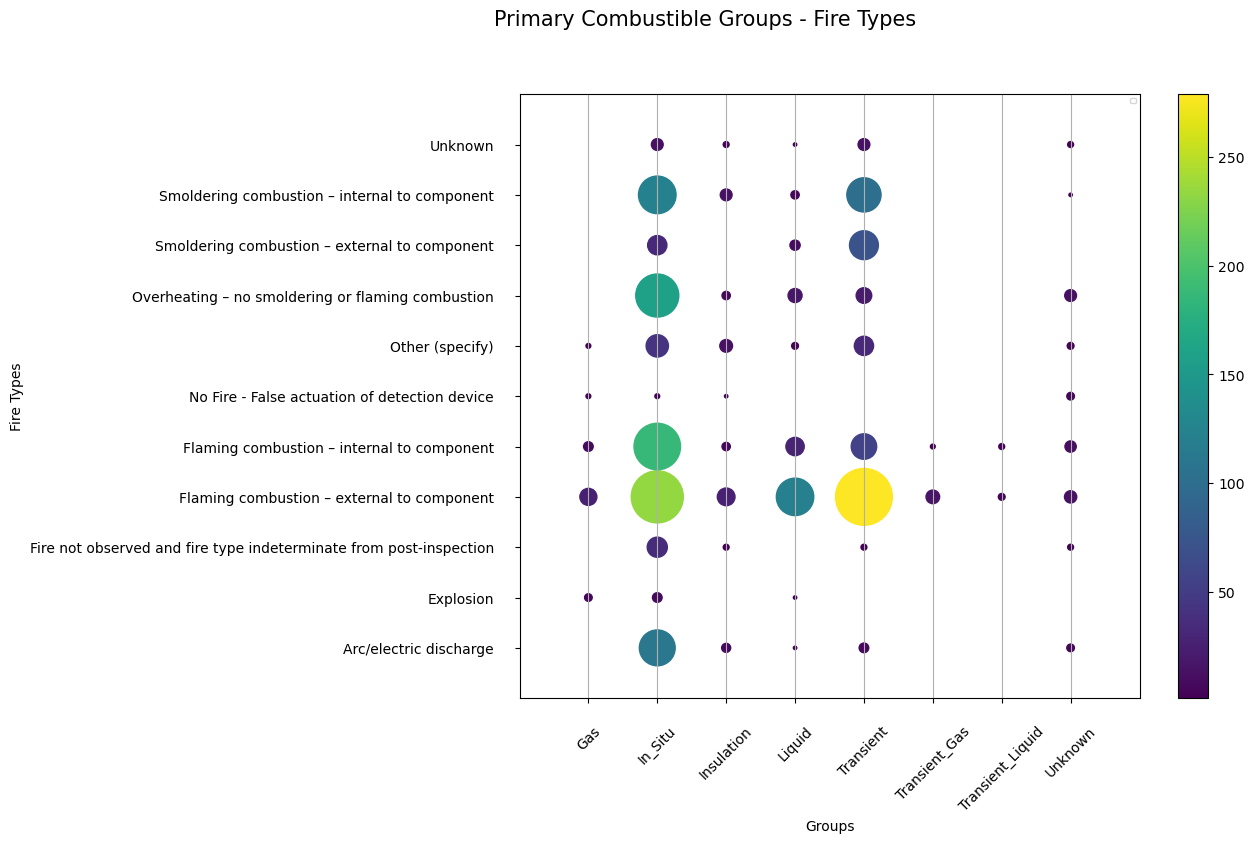

In [140]:
df_em_gpft = df_epri_merge[['Combustible Group', 'Fire Type']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Combustible Group', 'Fire Type'])['Fire Type'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [6*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_epri_merge['Fire Type'].dropna().unique().tolist())
yTickmarks = sorted(df_epri_merge['Combustible Group'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(10,8), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)


plt.scatter(x, y, s = s, c = s_c)
plt.colorbar()
axes1.tick_params(axis='both', which='major', pad=15)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(yTickmarks, rotation = 45)
axes1.set_yticklabels(xTickmarks)
axes1.set_ylabel('Fire Types')
axes1.set_xlabel('Groups')
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Primary Combustible Groups - Fire Types', fontsize = 15, x=0.3, y = 1.1)

plt.show()

In [141]:
df_epri_merge['Disposition'] = df_epri_merge['Disposition_FES']

In [142]:
df_epri_merge['Disposition'].unique()

array(['Undetermined', 'Not Challenging', 'Challenging', nan,
       'Not Evaluated', 'Potentially Challenging', 'Undetermined (NC‐PC)',
       'Undetermined (PC‐CH)'], dtype=object)

In [143]:
df_epri_merge['Disposition'] = df_epri_merge['Disposition'].replace(['Undetermined (NC‐PC)', 'Undetermined (PC‐CH)'],
                                                                    'Undetermined')

In [144]:
df_epri_merge['Disposition1'] = df_epri_merge['Disposition_FES'] 

In [145]:
df_epri_merge['Disposition1'].unique()

array(['Undetermined', 'Not Challenging', 'Challenging', nan,
       'Not Evaluated', 'Potentially Challenging', 'Undetermined (NC‐PC)',
       'Undetermined (PC‐CH)'], dtype=object)

In [146]:
df_epri_merge['Disposition1'] = df_epri_merge['Disposition1'].replace(['Challenging', 'Potentially Challenging', 'Undetermined (PC‐CH)'],
                                                                     'Challenging')

In [147]:
df_epri_merge['Disposition1'] = df_epri_merge['Disposition1'].replace(['Not Challenging', 'Undetermined (NC‐PC)'],
                                                                     'Not Challenging')

In [148]:
df_epri_merge['Disposition1'] = df_epri_merge['Disposition1'].replace(['Undetermined', 'Not Evaluated'],
                                                                     'Not Evaluated')

# Merged Data

In [149]:
df_epri_merge

Event Date_FES  Disposition_FES Outside PA Plant Area  \
FireID                                                         
1.0        12/12/2006     Undetermined         No        NaN   
2.0          1/5/1999  Not Challenging        Yes        NaN   
3.0         1/14/1999      Challenging         No        NaN   
4.0               NaN              NaN        NaN        NaN   
5.0         5/18/1999    Not Evaluated        Yes        NaN   
...               ...              ...        ...        ...   
NaN               NaN              NaN        NaN        NaN   
NaN               NaN              NaN        NaN        NaN   
NaN               NaN              NaN        NaN        NaN   
NaN               NaN              NaN        NaN        NaN   
NaN               NaN              NaN        NaN        NaN   

                               Building  \
FireID                                    
1.0     Main Transformer or Switch Yard   
2.0     Main Transformer or Switch Yard   
3.0         Other (Specify in comments)   
4.0                                 NaN   
5.0     Main Transformer or Switch Yard   
...                                 ...   
NaN                                 NaN   
NaN                                 NaN   
NaN                                 NaN   
NaN                                 NaN   
NaN                                 NaN   

                                            System Component Group  \
FireID                                                               
1.0                              Switchyard System       Generator   
2.0     Medium Voltage Power System (601V to 35kV)    Transformers   
3.0                         Hydrogen Supply System           Other   
4.0                                            NaN             NaN   
5.0     Medium Voltage Power System (601V to 35kV)             NaN   
...                                            ...             ...   
NaN                                            NaN             NaN   
NaN                                            NaN             NaN   
NaN                                            NaN             NaN   
NaN                                            NaN             NaN   
NaN                                            NaN             NaN   

                           Component                 Voltage Current Type  \
FireID                                                                      
1.0     Electric Bus Bar or Bus Duct        13 KV or greater           AC   
2.0           Oil‐filled Transformer        13 KV or greater           AC   
3.0                              NaN                     NaN          NaN   
4.0                              NaN                     NaN          NaN   
5.0                     Transformers  Oil‐filled Transformer           AC   
...                              ...                     ...          ...   
NaN                              NaN                     NaN          NaN   
NaN                              NaN                     NaN          NaN   
NaN                              NaN                     NaN          NaN   
NaN                              NaN                     NaN          NaN   
NaN                              NaN                     NaN          NaN   

        ... Event Date_PR   Disposition_PR Mode Prior   Mode After  \
FireID  ...                                                          
1.0     ...    12/12/2006     Undetermined    Operate  Hot Standby   
2.0     ...      1/5/1999  Not Challenging    Operate  Hot Standby   
3.0     ...     1/14/1999      Challenging    Operate      Operate   
4.0     ...           NaN              NaN        NaN          NaN   
5.0     ...     5/18/1999    Not Evaluated  Refueling    Refueling   
...     ...           ...              ...        ...          ...   
NaN     ...           NaN              NaN        NaN          NaN   
NaN     ...           NaN              NaN        NaN          NaN   
N

# Saving the cleaned merged data to excel sheet

In [150]:
df_epri_merge.to_excel('EPRI_merged3.xlsx')

In [151]:
df_epri_merge.columns

Index(['Event Date_FES', 'Disposition_FES', 'Outside PA', 'Plant Area',
       'Building', 'System', 'Component Group', 'Component', 'Voltage',
       'Current Type', 'Event Date_FEA', 'Disposition_FEA', 'Fire Cause',
       'Combustible Group', 'Type', 'Form', 'Fire Type', 'Smoke',
       'Temperature', 'Damage Extent', 'Collateral Damage', 'Event Date_FSE',
       'Disposition_FSE', 'Review Status:', 'Automatic Determination',
       'Unnamed: 5', 'Unnamed: 6', 'Event Date_FTS', 'Disposition_FTS',
       'Ignition', 'Discovery', 'Duration Certainty', 'Duration',
       'Detection Method', 'Detection Performance', 'Suppression Method',
       'Suppression Agent', 'Unnamed: 11', 'Unnamed: 12', 'Event Date_PR',
       'Disposition_PR', 'Mode Prior', 'Mode After', 'Power Level Prior',
       'Power Level After', 'Power Effect', 'EAL Declaration', 'Disposition',
       'Disposition1'],
      dtype='object')

# Plots

# Fire Events at NPPs for years between (1990-2009)

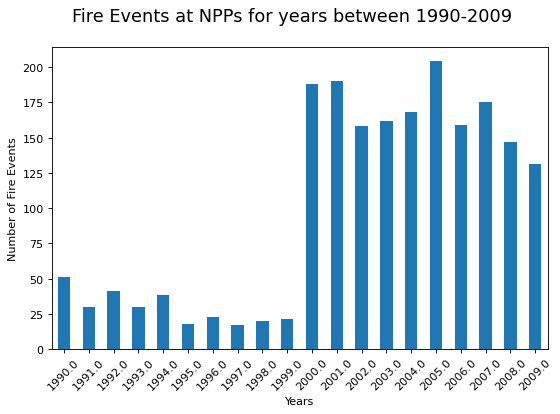

In [152]:
fig_year = plt.figure(figsize=(8, 5), dpi=80)
df_epri_merge['Event Date_FES'] = pd.to_datetime(df_epri_merge['Event Date_FES'])
df_epri_merge['year'] = df_epri_merge['Event Date_FES'].dt.year
df1 = df_epri_merge['year'].sort_values(ascending = True)
fig_year.suptitle('Fire Events at NPPs for years between 1990-2009', fontsize=16)
# .value_counts(sort= False, ascending = True)
(df1.value_counts(sort= False, ascending = True).sort_index(ascending = True)).plot(kind ='bar', rot= 45)
plt.xlabel('Years')
plt.ylabel('Number of Fire Events')
plt.show()
fig_year.savefig(sys_plot + "Fire Events at NPPs for years between 1990-2009.png", bbox_inches='tight')

In [153]:
df_epri_merge['year'].unique()

array([2006., 1999.,   nan, 2000., 1990., 1991., 1992., 1993., 1994.,
       1995., 1996., 1997., 1998., 2001., 2002., 2003., 2004., 2005.,
       2007., 2008., 2009.])

# Disposition of Fire Events at NPPs between 1990-2009

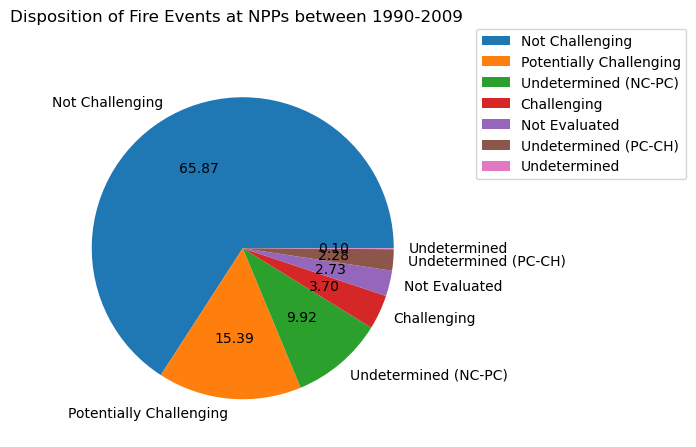

In [154]:
fig_disp = plt.figure(figsize=(5,5), dpi=100)
ax_disp = plt.subplot(111)
df_epri_merge['Disposition_FES'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
#plt.legend(loc='upper left')
fig_disp.suptitle('Disposition of Fire Events at NPPs between 1990-2009', fontsize=12 )
ax_disp.legend(bbox_to_anchor=(1.1, 1.1))
plt.show()
fig_disp.savefig("Disposition of Fire Events at NPPs between 1990-2009.png", bbox_inches='tight')

# Plant Area for Fire Events at NPP for 1990-2009

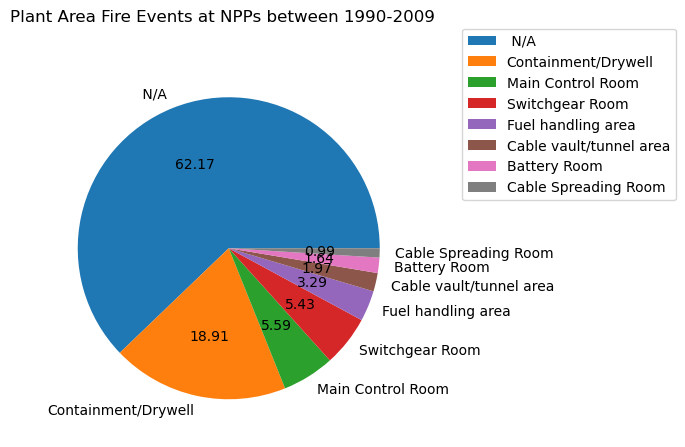

In [155]:
fig_ptar = plt.figure(figsize=(5,5), dpi=100)
ax_ptar = plt.subplot(111)
df_epri_merge['Plant Area'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
#plt.legend(loc='upper left')
fig_ptar.suptitle('Plant Area Fire Events at NPPs between 1990-2009', fontsize=12)
ax_ptar.legend(bbox_to_anchor=(1.1, 1.1))
plt.show()
fig_ptar.savefig("Plant Area.png", bbox_inches='tight')

# NPP Building for Fire Events (1990-2009)

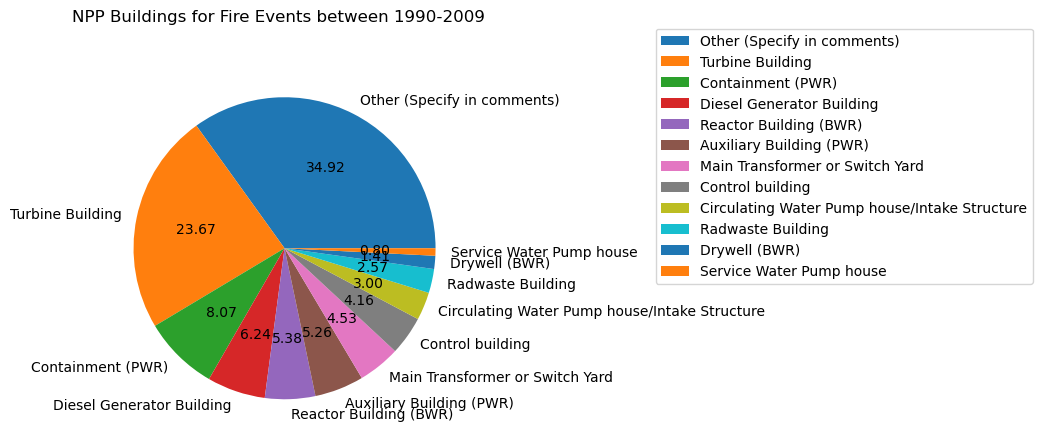

In [156]:
fig_bd = plt.figure(figsize=(5,5), dpi=100)
ax_bd = plt.subplot(111)
df_epri_merge['Building'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
#plt.legend(loc='upper left')
fig_bd.suptitle('NPP Buildings for Fire Events between 1990-2009', fontsize=12)
ax_bd.legend(bbox_to_anchor=(2.5, 1.1))
plt.show()
fig_bd.savefig("Building.png", bbox_inches='tight')

# Systems in which Fire Events Occured

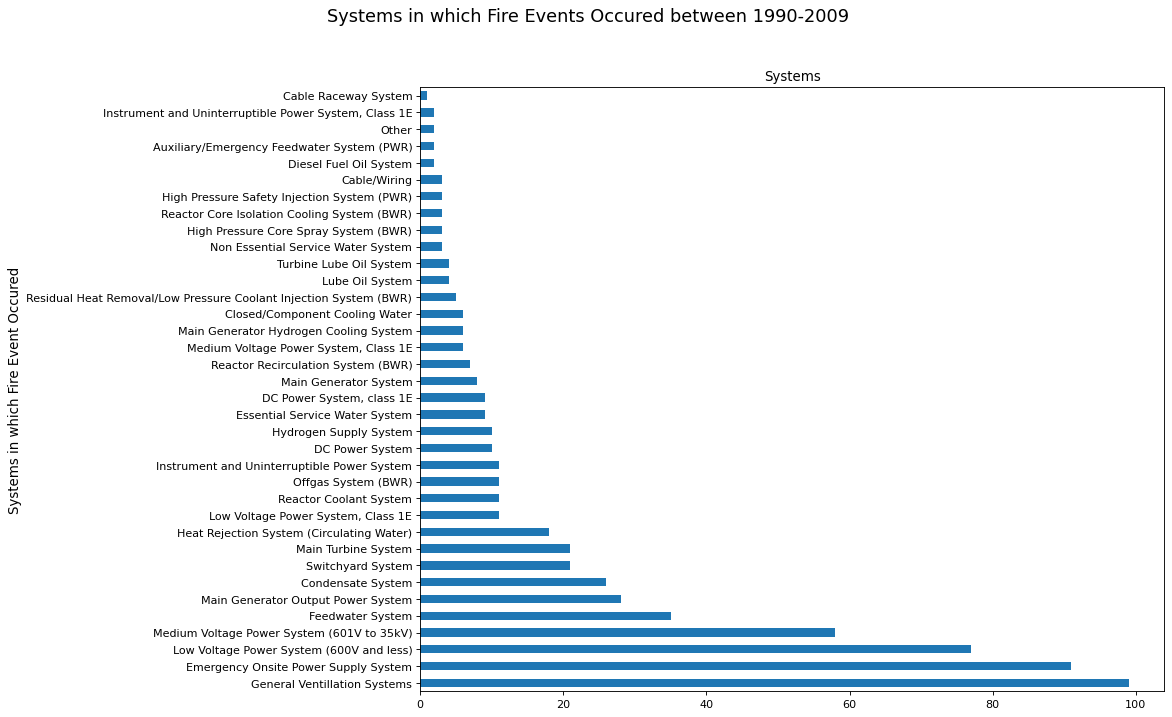

In [157]:
fig_sys = plt.figure(figsize=(12, 10), dpi=80)
fig_sys.suptitle('Systems in which Fire Events Occured between 1990-2009', fontsize=16, x = 0.3, y = 0.98)
df_epri_merge['System'].value_counts(sort= True, ascending=False).plot(kind='barh')
plt.ylabel('Systems in which Fire Event Occured', fontsize = 12)
plt.title('Systems', loc = 'Center')
plt.show()
fig_sys.savefig("Sys 1990-2009.png", bbox_inches='tight')

# Component Groups in which Fire Events originated

According to [1]. General type of component that the fire started in (if applicable).\
Options are any of the following:\
a) Pumps\
b) Electric Motor (exclude pump motors)\
c) Generators\
d) Boilers\
e) Lube oil system\
f) Transformers\
g) Electrical panel or distribution equipment\
h) Batteries\
i) Electrical cable/wiring (voltage, material type, IEEE qualified)\
j) Dryers\
k) Air Compressors\
l) Junction Boxes\
m) Outlets\
n) Lighting Ballasts\
o) Crane\
p) Bus Ducts\
q) Other (specify)\

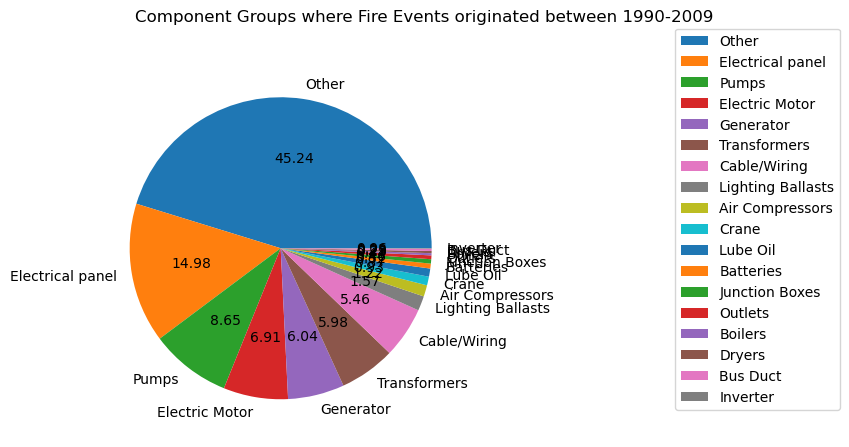

In [158]:
fig_cg = plt.figure(figsize=(5,5), dpi=100)
ax_cg = plt.subplot(111)
df_epri_merge['Component Group'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
#plt.legend(loc='upper left')
fig_cg.suptitle('Component Groups where Fire Events originated between 1990-2009', fontsize=12, x = 0.8)
ax_cg.legend(bbox_to_anchor=(2, 1.1))
plt.show()
fig_cg.savefig("Component Groups.png", bbox_inches='tight')

# Electric Current Types for Fire Events in NPP (1990-2009)

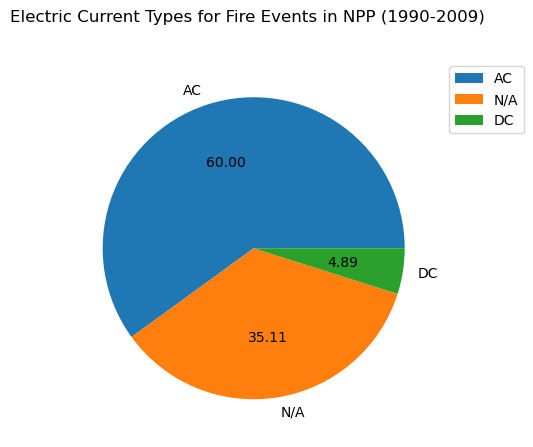

In [159]:
fig_ct = plt.figure(figsize=(5,5), dpi=100)
ax_ct = plt.subplot(111)
df_epri_merge['Current Type'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
#plt.legend(loc='upper left')
fig_ct.suptitle('Electric Current Types for Fire Events in NPP (1990-2009)', fontsize=12)
ax_ct.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()
fig_ct.savefig("Current Type.png", bbox_inches='tight')

# Reactor Mode Prior and After Fire Event Detection

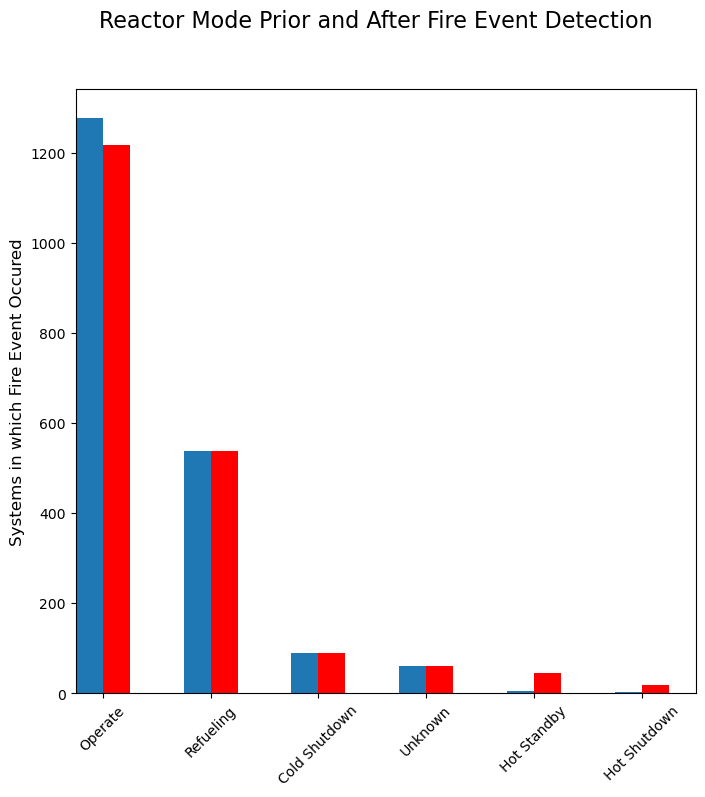

In [160]:
fig_mpa = plt.figure(figsize=(8, 8), dpi=100)
fig_mpa.suptitle('Reactor Mode Prior and After Fire Event Detection', fontsize=16, x = 0.5, y = 0.98)
df_epri_merge['Mode Prior'].value_counts(ascending=False).plot(kind='bar', position =1, width = 0.25, rot = 45)
df_epri_merge['Mode After'].value_counts(ascending=False).plot(kind='bar', position =0, width = 0.25, color = 'red', rot =45)
plt.ylabel('Systems in which Fire Event Occured', fontsize = 12)
plt.show()
fig_mpa.savefig("Reactor Mode.png", bbox_inches='tight')

# Primary Combustible Groups

**a) Liquid – Flammable or combustible liquid:**\
&nbsp;&nbsp;&nbsp;&nbsp;i. Type of liquid:\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a. Lube oil or grease\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b. Fuel oil\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;c. Transformer oil\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;d. Cleaning solvents or paint\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;e. Other (specify)\
&nbsp;&nbsp;&nbsp;&nbsp;ii. Form of liquid:\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a. Pressurized spray\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b. Leak – oil soaked insulation\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;c. Spill confined by curbs or other physical features\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;d. Contained within reservoir\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;e. Contained within component\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;f. Unconfined spill\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;g. Other (specify)\
**b) Insulation – Cable jacketing or electrical insulation materials:**\
&nbsp;&nbsp;&nbsp;&nbsp;i. Type of cable material:\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a. Thermoplastic\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b. Thermoset\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;c. Mixed\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;d. Type not specified\
&nbsp;&nbsp;&nbsp;&nbsp;ii. Form of cable materials:\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a. Multiple bundles\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b. Cable tray stack\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;c. Multiple cables not in tray or bundle\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;d. Stored unused cables\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;e. Single bundle\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;f. Single cable tray\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;g. Single cable\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;h. Unknown\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;i. Other (specify)\
**c) In-situ – Other solid in-situ materials:**\
&nbsp;&nbsp;&nbsp;&nbsp;i. Type of in-situ material\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a. Other electrical or electronic equipment\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b. Thermal insulation material\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;c. Interior finish\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;d. Other (specify)\
**d) Transient – Other solid transient materials:**\
&nbsp;&nbsp;&nbsp;&nbsp;i. Type of other solid transient material\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a. Celluosic materials including wood, paper or other solid transients\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b. Temporary electrical wiring or equipment\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;c. Plastic Sheets\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;d. Temporary thermal insulation materials\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;e. Trash (i.e. solid refuse collected for disposal)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;f. Other (specify)\
**e) Gas – Flammable or combustible gas:**\
&nbsp;&nbsp;&nbsp;&nbsp;i. Type of gas:\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a. Hydrogen\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b. Other (specify)\
&nbsp;&nbsp;&nbsp;&nbsp;ii. Form of gas when ignited:\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a. Pressurized in container\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b. Jet from a pressurized source\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;c. Ambient pressure, within a compartment\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;d. Ambient pressure, within a component\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;e. Unconfined liquid spill\
**f) Transient (Liquid) – Transient Liquids**\
**g) Transient (Gas) – Transient Gas**\
**h) Unknown – Source combustible is unknown**

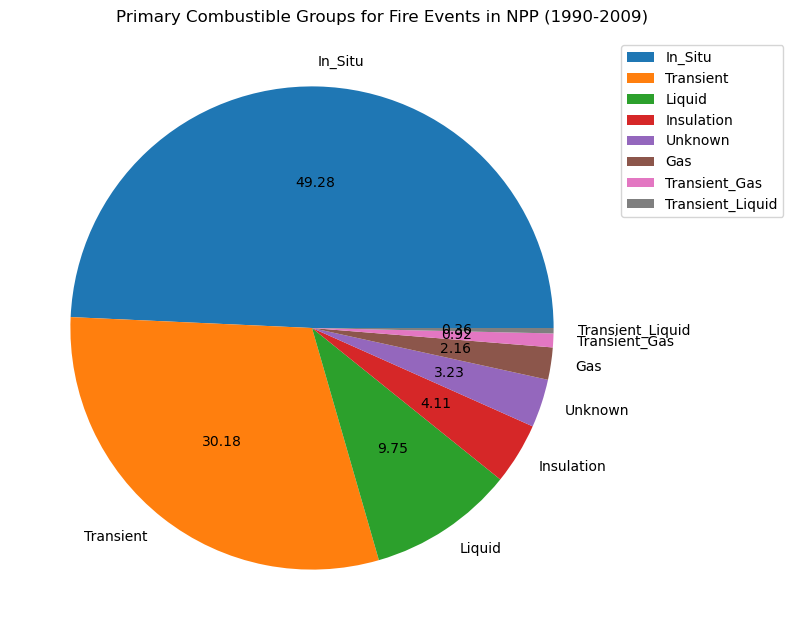

In [161]:
fig_grp = plt.figure(figsize=(8, 8), dpi=100)
ax_grp  = plt.subplot(111)
df_epri_merge['Combustible Group'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
#plt.legend(loc='upper left')
fig_grp.suptitle('Primary Combustible Groups for Fire Events in NPP (1990-2009)', fontsize=12, x = 0.6, y = 0.9)
ax_grp.legend(bbox_to_anchor=(1.0, 0.98))
plt.show()
fig_grp.savefig("Primary Combustible Groups.png", bbox_inches='tight')

# Fire Type of different fire events NPP (1990-2009)

According to [1] the most severe type of combustion between ignition and\
extinction observed during the fire event. Options are:\
a) Flaming combustion – external to component\
b) Flaming combustion – internal to component\
c) Smoldering combustion – external to component\
d) Smoldering combustion – internal to component\
e) Overheating – no smoldering or flaming combustion\
f) Fully developed compartment fire\
g) Explosion\
h) Arc/electric discharge\
i) No fire – false actuation of detection device\
j) Fire not observed and fire type indeterminate from post-inspection\
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;i. Fire suppressed by fixed suppression\
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ii. Fire self-extinguished\
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;iii. Fire contained within a component\
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;iv. Room entry not possible before mitigation\
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;v. Other (specify)\
k) Other (specify)\
l) Unknown\

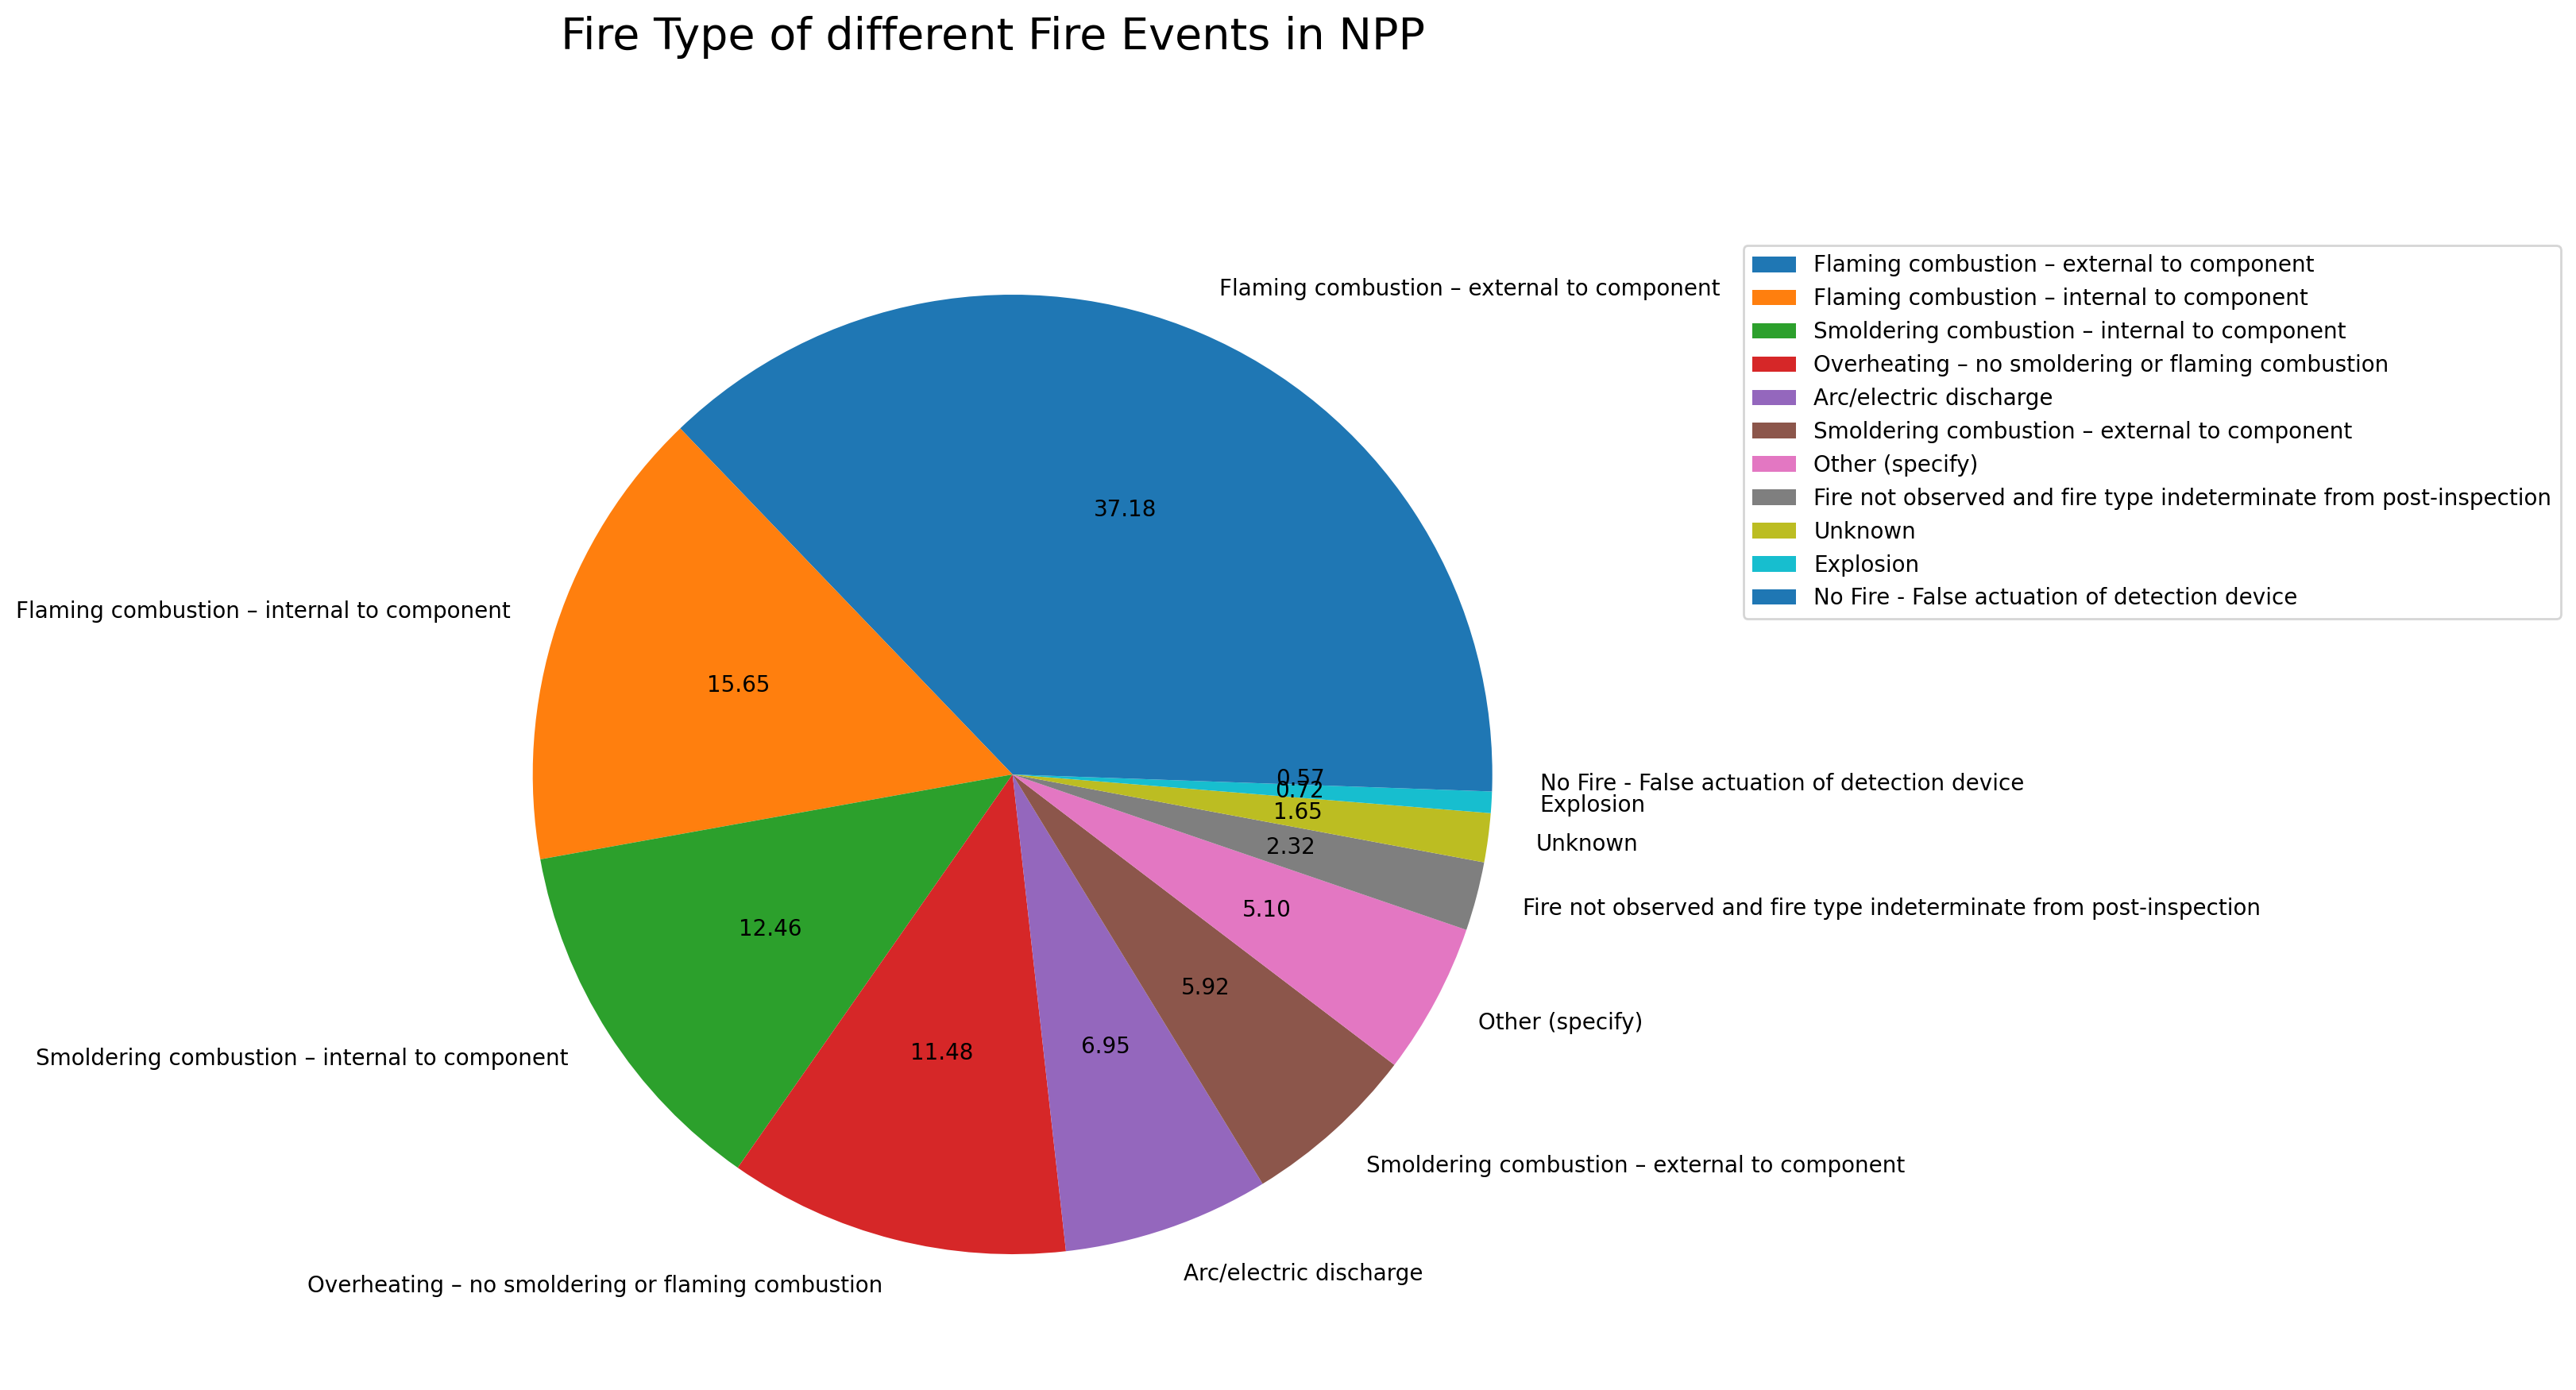

In [162]:
fig1 = plt.figure(figsize=(10,10), dpi=200)
ax = plt.subplot(111)
df_epri_merge['Fire Type'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
#plt.legend(loc='upper left')
fig1.suptitle('Fire Type of different Fire Events in NPP', fontsize=20)
ax.legend(bbox_to_anchor=(1.1, 0.95))
plt.show()
fig1.savefig("Fire Type.png", bbox_inches='tight')

# Primary Combustible Groups - Fire Type

In [164]:
gp   = df_epri_merge['Fire Type'].groupby(df_epri_merge['Combustible Group']).value_counts()
ppdf = pd.DataFrame(gp.unstack(level=0))

from matplotlib import cm
cs = ["magenta", "green", "crimson", "orange", "pink", "cyan", "yellow", "darkblue", "red", "purple", "coral"]

fig_gp, ax_pt = plt.subplots(8, 1, figsize = (120, 100), dpi = 200)
fig_gp.suptitle('Primary Combustible Group - Fire Type', fontsize=30, x = 0.55, y = 0.9)
ppdf.Gas.plot(kind='pie', ax = ax_pt[0], label ='',
              autopct= lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '',
              fontsize = 16, colors = cs)
ax_pt[0].title.set_text('Gas')
ax_pt[0].title.set_size(22)
ax_pt[0].legend(bbox_to_anchor=(2.5, 0.95), fontsize = 18)

ppdf.Insulation.plot(kind='pie', ax = ax_pt[1], label = '',
                      autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '',
                     fontsize = 16, colors = cs)
ax_pt[1].title.set_text('Insulation')
ax_pt[1].title.set_size(22)
ax_pt[1].legend(bbox_to_anchor=(3, 0.95), fontsize = 18)

ppdf.In_Situ.plot(kind='pie', ax = ax_pt[2], label = '', 
                  autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '',
                  fontsize = 16, colors = cs)
ax_pt[2].title.set_text('In-Situ')
ax_pt[2].title.set_size(22)
ax_pt[2].legend(bbox_to_anchor=(2.8, 0.95), fontsize = 18)

ppdf.Liquid.plot(kind='pie', ax = ax_pt[3], label = '',
                  autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '',
                 fontsize = 16, colors = cs)
ax_pt[3].title.set_text('Liquid')
ax_pt[3].title.set_size(22)
ax_pt[3].legend(bbox_to_anchor=(2.5, 0.95), fontsize = 18)

ppdf.Transient.plot(kind='pie', ax = ax_pt[4], label = '',
                     autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '',
                    fontsize = 16, colors = cs)
ax_pt[4].title.set_text('Transient')
ax_pt[4].legend(bbox_to_anchor=(2.5, 1), fontsize = 18)

ppdf.Transient_Gas.plot(kind='pie', ax = ax_pt[5], label ='',
                         autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '',
                        fontsize = 16, colors = cs)
ax_pt[5].title.set_text('Transient (Gas)')
ax_pt[5].title.set_size(22)
ax_pt[5].legend(bbox_to_anchor=(2, 0.95), fontsize = 18)

ppdf.Transient_Liquid.plot(kind='pie', ax = ax_pt[6], label ='',
                            autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '',
                           fontsize = 16, colors = cs)
ax_pt[6].title.set_text('Transient (Liquid)')
ax_pt[6].title.set_size(22)
ax_pt[6].legend(bbox_to_anchor=(1, 1), fontsize = 18)

ppdf.Unknown.plot(kind='pie', ax = ax_pt[7], label = '',
                   autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '',
                  fontsize = 16, colors = cs)
ax_pt[7].title.set_text('Unknown')
ax_pt[7].title.set_size(22)
ax_pt[7].legend(bbox_to_anchor=(3, 0.95), fontsize = 18)

plt.show()
fig_gp.savefig("Primary combustible group - Fire Type 1990-2009_3.png", bbox_inches='tight')

# Fire Cause of different fire events NPP (1990-2009)

According to [1] Fire cause – Options are:\
a) Electrical failure resulting in overheating materials\
b) Electrical failure resulting in an arcing fault\
i. High Energy Arc Fault (HEAF)\
ii. Electrical arcing or sparks (non-HEAF)\
c) Overheated material (lube oil, pump packing, thermal insulation, etc.)\
d) Explosion (hydrogen gas ignition, fuel vapor ignition)\
e) Hot work (e.g., sparks or slag from welding, cutting or grinding)\
f) Suspicious\
g) Other (other personnel error, natural effect, etc. specify in comments)\
h) False actuation of detector, no ignition or overheat condition\
i) Unknown\
j) Personnel error: Misuse of material ignited\
k) Personnel error: Misuse of heating devices\
l) Mechanical equipment malfunction/failure\
m) Personnel error during test and maintenance activity\

In [165]:
df_epri_merge['Fire Cause'].value_counts()

Electrical failure resulting in overheating materials                                          585
Hot work (cutting/welding/grinding/etc.)                                                       474
Overheated Material (lube oil, pump packing, thermal insulation, etc.)                         293
Electrical arcing or sparks (non‐HEAF)                                                         196
Other (other personnel error, natural effect, etc. specify in comments)                        124
Unknown                                                                                         95
Mechanical equipment malfunction/failure                                                        82
Personnel error: Misuse of material ignited                                                     25
Personnel error: Misuse of heating devices                                                      24
Explosion (hydrogen gas ignition, fuel vapor ignition, other volatile fluid vapor ignition)     14
High Energ

In [166]:
fig2 = plt.figure(figsize=(25,25), dpi=200)
ax = plt.subplot(111)
df_epri_merge['Fire Cause'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=40)
#plt.legend(loc='upper left')
fig2.suptitle('Fire Cause of different Fire Events in NPP', fontsize=50)
ax.legend(bbox_to_anchor=(3.2, 1.2), fontsize = 40)
plt.show()

In [167]:
fig2.savefig("Fire Cause.png", bbox_inches='tight')

In [168]:
from textwrap import wrap

# Correlation

In [169]:
def correlation_plot(group1, group2, siz_x, siz_y):
    df_em_gpft = df_epri_merge[[group1, group2]].reset_index(drop = True)
    df_em_gpft = pd.DataFrame(df_em_gpft)
    counts = df_em_gpft.groupby([group1, group2])[group2].count()

    x_list = counts.index.get_level_values(0).tolist()
    y_list = counts.index.get_level_values(1).tolist()
    s      = [6*n for n in counts.values]
    s_c    = [n for n in counts.values]


    xTickmarks = sorted(df_epri_merge[group2].dropna().unique().tolist())
    yTickmarks = sorted(df_epri_merge[group1].dropna().unique().tolist())

    x = [yTickmarks.index(i) for i in x_list]
    y = [xTickmarks.index(i) for i in y_list]
    
    xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
    ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

    matplotlib.rc('font', serif='Helvetica Neue')
    matplotlib.rc('text', usetex='false')
    matplotlib.rcParams.update({'font.size': 10})
    fig = plt.figure(figsize=(siz_x, siz_y), dpi = 100) # for landscape
    axes1 = fig.add_subplot(111)
    title = '%s - %s' %(group1, group2)
    save  = '%s - %s.png' %(group1, group2)

    plt.scatter(x, y, s = s, c = s_c)
    cb = plt.colorbar()
    cb.set_label('Frequency', fontsize=14)
    
    axes1.tick_params(axis='both', which='major', pad=10)
    axes1.set_xlim((-1, len(yTickmarks)))
    axes1.set_ylim((-1, len(xTickmarks)))
    axes1.set_xticks(xrange(len(yTickmarks)))
    axes1.set_yticks(xrange(len(xTickmarks)))
    axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 12)
    axes1.set_yticklabels(xlabels, fontsize = 12)
    axes1.set_ylabel(group2, fontsize = 14)
    axes1.set_xlabel(group1, fontsize = 14)
    axes1.legend(prop={'size':5}, ncol=4)
    axes1.xaxis.grid(True)
    axes1.set_title(title, fontsize = 15, x=0.5, y = 1.0)

    plt.show()
    fig.savefig(sys_plot + save, bbox_inches='tight')
    #fig.savefig(save, bbox_inches='tight')

# Group - Fire Type

No handles with labels found to put in legend.


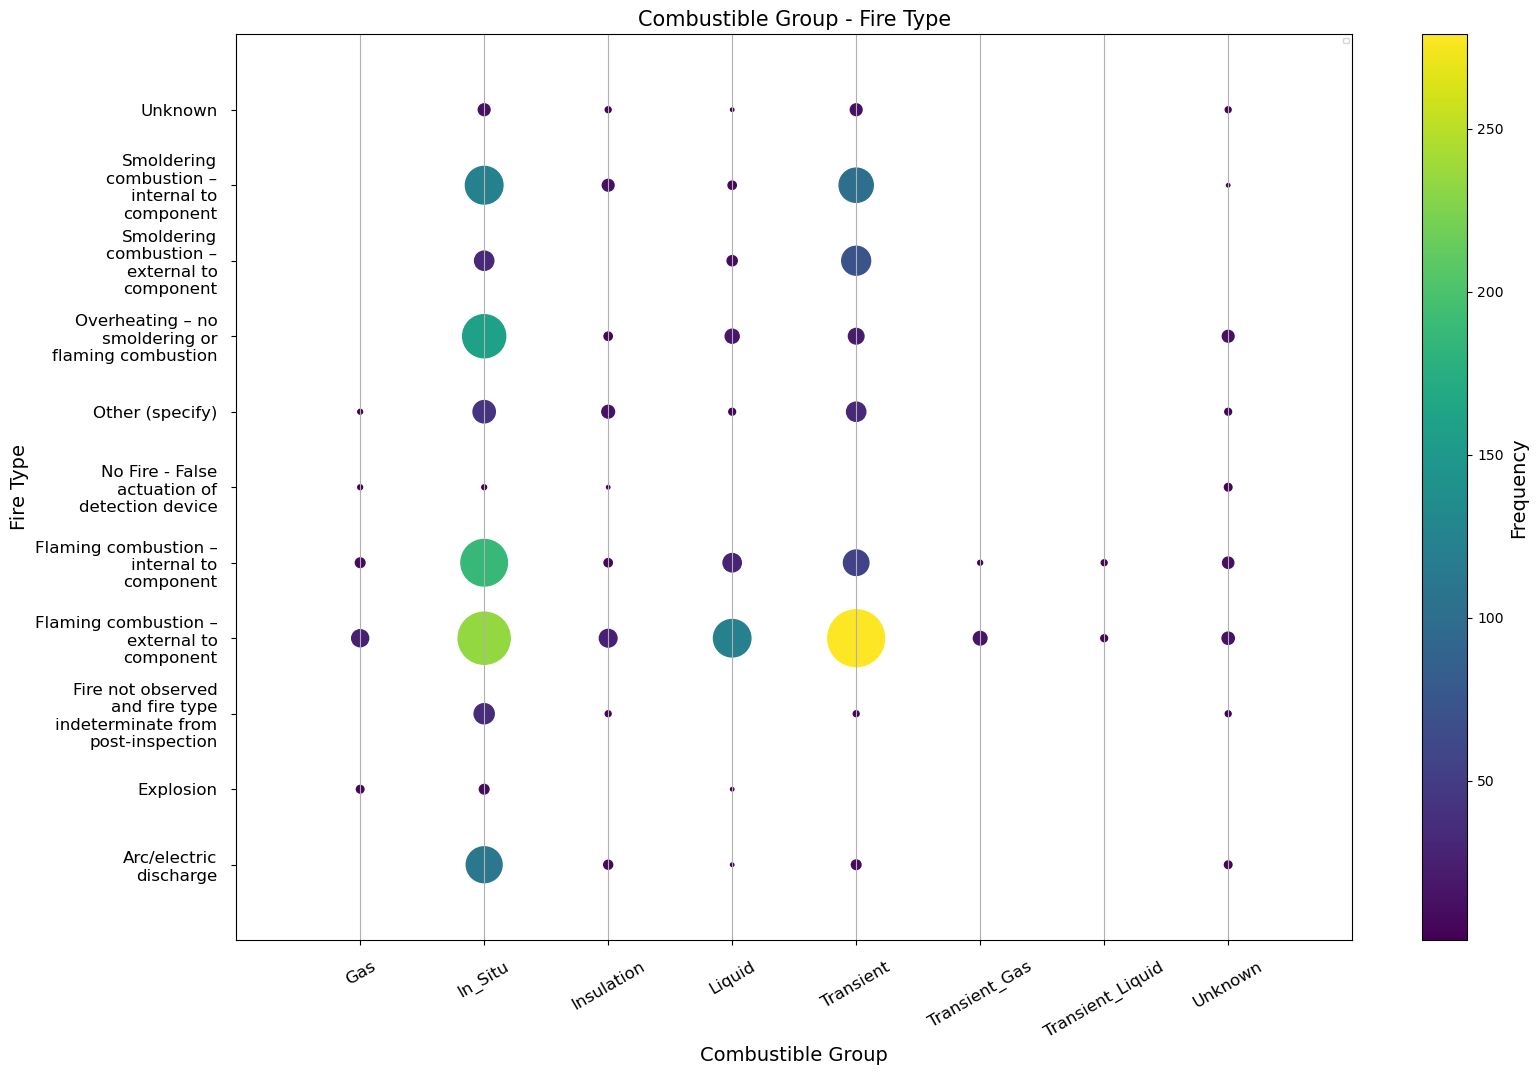

In [171]:
correlation_plot('Combustible Group', 'Fire Type', 18, 12)

# Component Group - Fire Type

In [172]:
#correlation_plot('Component Group', 'Fire Type', 18, 12)

# Plant Area - Fire Type

In [173]:
#correlation_plot('Plant Area', 'Fire Type', 18, 12)

# Building- Fire Type

In [174]:
#correlation_plot('Building', 'Fire Type', 18, 12)

# System - Fire Type

In [175]:
#correlation_plot('System', 'Fire Type', 40, 30)

# Fire Cause- Fire Type

In [176]:
# print(sorted(df_epri_merge['Fire Cause'].dropna().unique()))
# print(df_epri_merge['Fire Cause'].value_counts())

In [177]:
#correlation_plot('Fire Cause', 'Fire Type', 30, 18)

# Primary Combustible Group - Fire Cause

In [178]:
#correlation_plot('Group', 'Fire Cause', 18, 16)

# Component Group - Fire Cause

In [179]:
#correlation_plot('Component Group', 'Fire Cause', 18, 15)

# Plant  Area - Fire Cause

In [180]:
#correlation_plot('Plant Area', 'Fire Cause', 18, 15)

# Building - Fire Cause

In [181]:
#correlation_plot('Building', 'Fire Cause', 18, 15)

# Building - Group

No handles with labels found to put in legend.


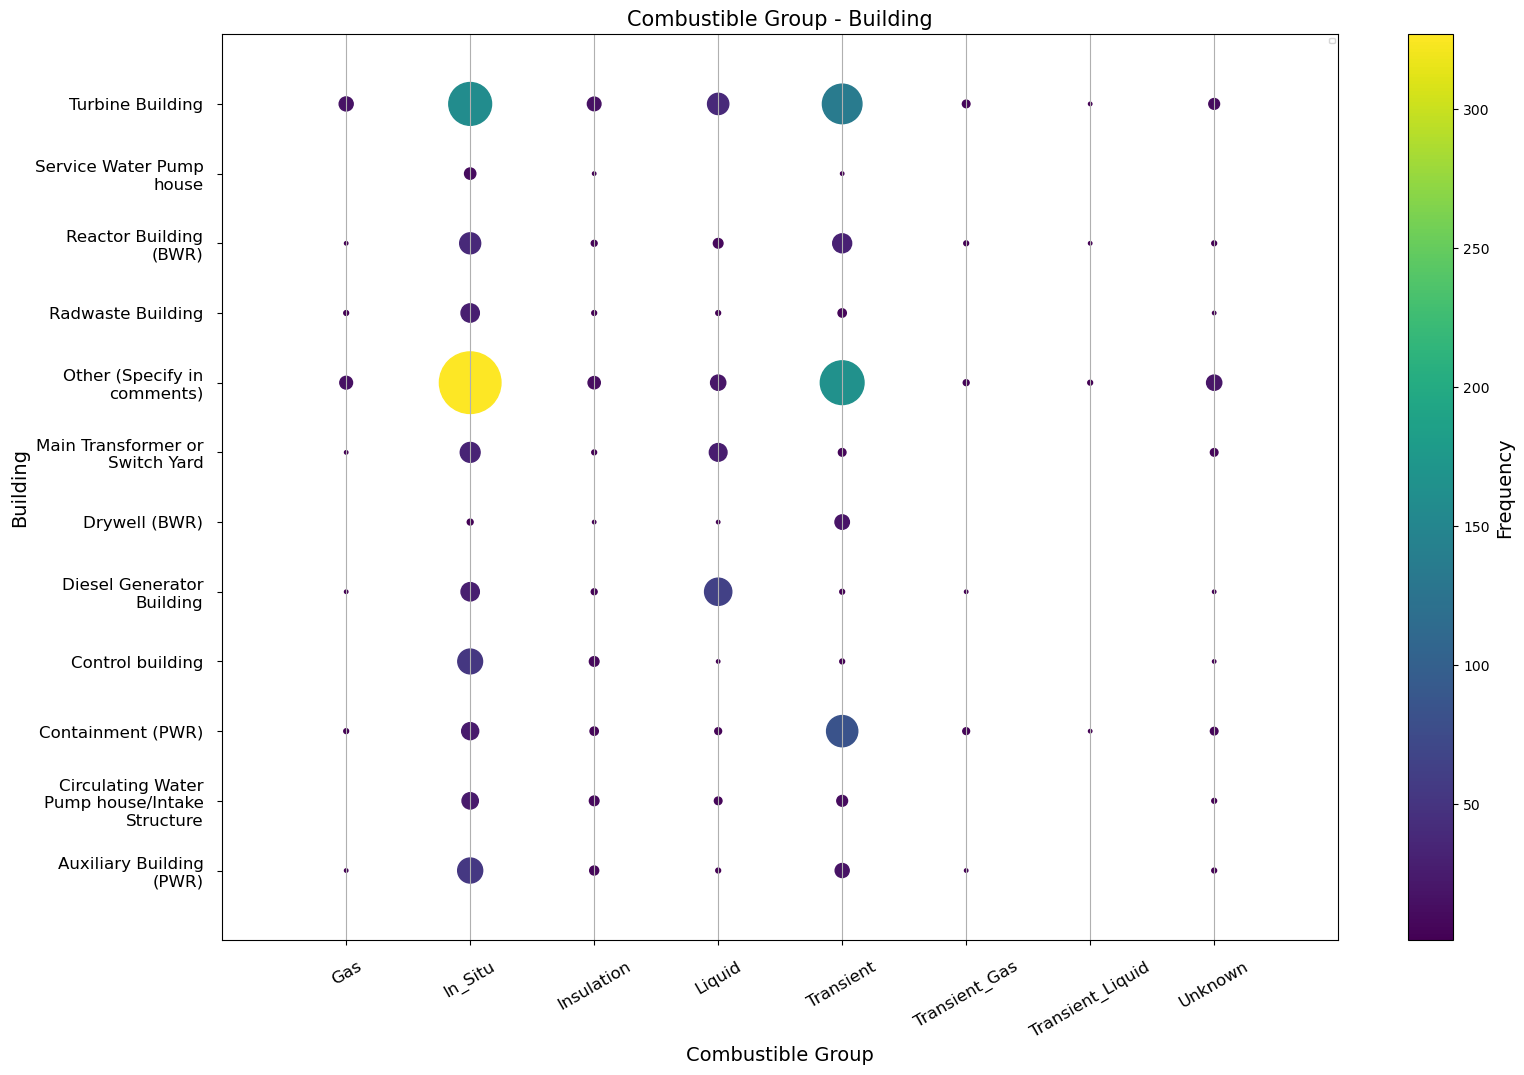

In [183]:
correlation_plot('Combustible Group', 'Building', 18, 12)

# Primary Combustible Type-Fire Type

In [184]:
#correlation_plot('Type', 'Fire Type', 36, 12)

# Primary Combustible Type-Fire Cause

In [185]:
#correlation_plot('Type', 'Fire Cause', 30, 15)

# Component Group - Building

In [186]:
#correlation_plot('Component Group', 'Building', 18, 12)

# Dispostion

# Group - Disposition

In [187]:
#correlation_plot('Group', 'Disposition', 18, 12)

# Fire Type - Disposition

In [188]:
#correlation_plot('Fire Type', 'Disposition', 22, 12)

# Fire Cause - Disposition

In [189]:
#correlation_plot('Fire Cause', 'Disposition_FES', 30, 12)

# Component Group - Disposition

In [190]:
#correlation_plot('Component Group', 'Disposition_FES', 30, 12)

No handles with labels found to put in legend.


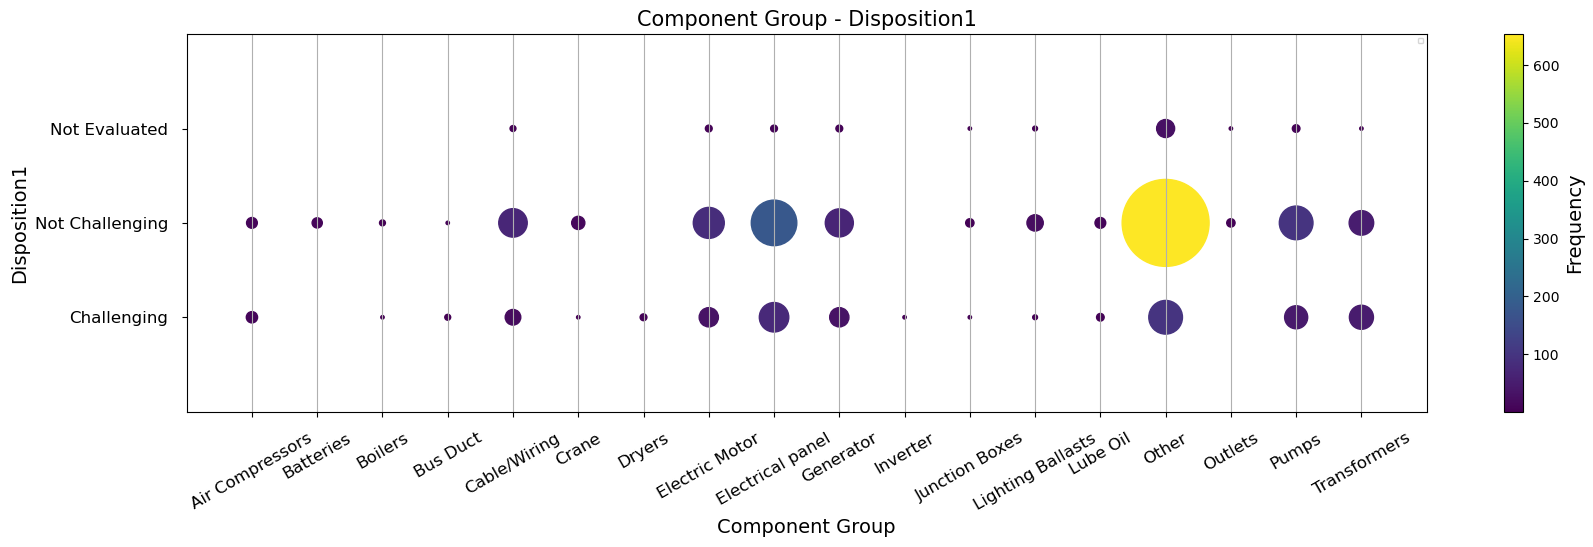

In [191]:
correlation_plot('Component Group', 'Disposition1', 20, 5)

No handles with labels found to put in legend.


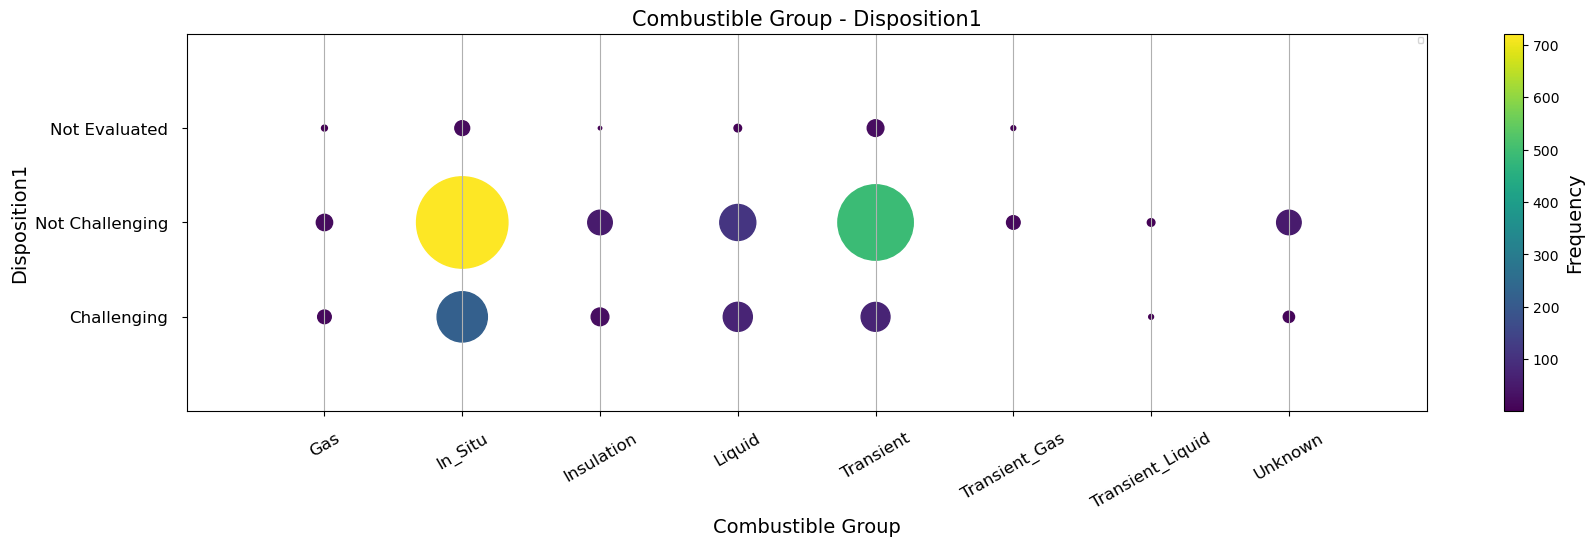

In [193]:
correlation_plot('Combustible Group', 'Disposition1', 20, 5)

No handles with labels found to put in legend.


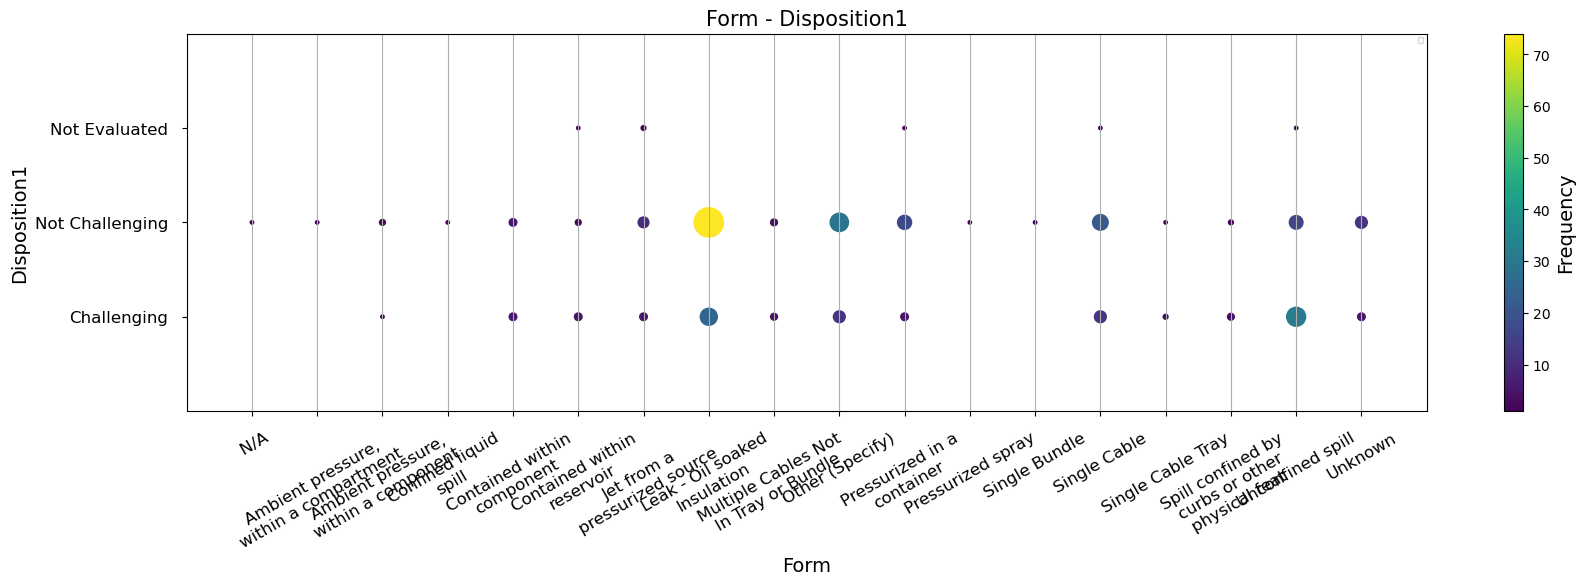

In [194]:
correlation_plot('Form', 'Disposition1', 20, 5)

In [195]:
df_em_challenging = df_epri_merge[df_epri_merge['Disposition1'] == 'Challenging']

In [196]:
#df_em_chal_liquid = df_em_challenging[df_em_challenging['Group'] == 'Liquid']

In [197]:
# df_epri_merge['Type'].unique()

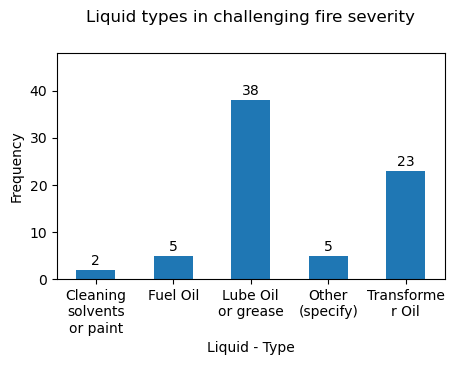

In [199]:
df_em_chal_liquid = df_em_challenging[df_em_challenging['Combustible Group'] == 'Liquid']

xTickmarks = sorted(df_em_chal_liquid['Type'].dropna().unique().tolist())
xlabels = [ '\n'.join(wrap(l, 10)) for l in xTickmarks]

fig_chal  = plt.figure(figsize=(5, 3), dpi = 100) 
axes_chal = fig_chal.add_subplot(111)
counts_liq = df_em_chal_liquid['Type'].value_counts().sort_index(ascending=True)
counts_liq.plot(kind='bar')

axes_chal.set_ylim((0, np.max(counts_liq)+10))
axes_chal.set_xticklabels(xlabels, rotation = 0)
axes_chal.set_title('Liquid types in challenging fire severity', fontsize = 12, x=0.5, y = 1.1)
axes_chal.set_ylabel('Frequency')
axes_chal.set_xlabel('Liquid - Type')

for i, d in enumerate(counts_liq):
    plt.text(x=i , y =d+1 , s=f"{d}" , fontdict=dict(fontsize=10), ha = 'center')
    
plt.show()
fig_chal.savefig(sys_plot + "Liquid Types.png", bbox_inches='tight')

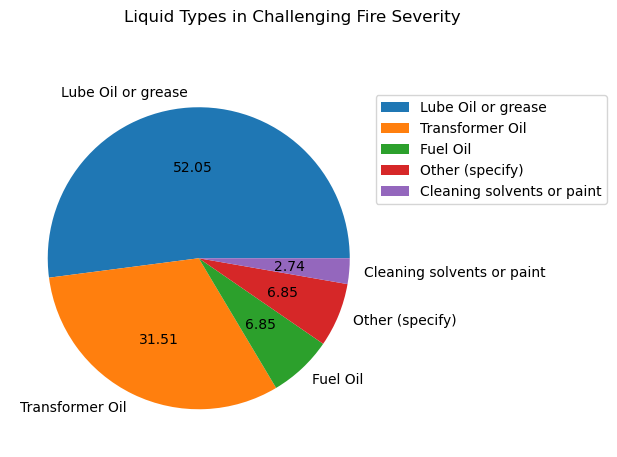

In [200]:
fig_liq = plt.figure(figsize=(5,5), dpi=100)
ax_liq = plt.subplot(111)
df_em_chal_liquid['Type'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
#plt.legend(loc='upper left')
fig_liq.suptitle('Liquid Types in Challenging Fire Severity', fontsize=12, x = 0.7, y =1)
ax_liq.legend(bbox_to_anchor=(0.95, 0.95), fontsize = 10)
plt.show()
fig_liq.savefig(sys_plot + "Liquid Types pie.png", bbox_inches='tight')

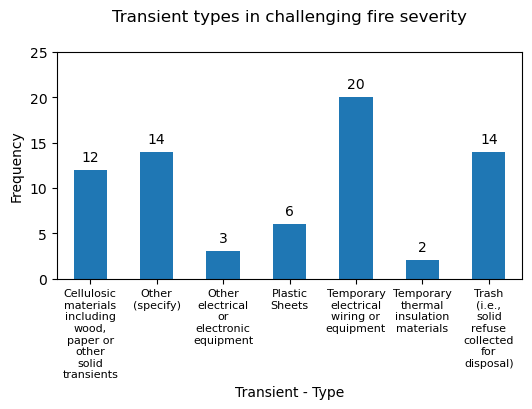

In [202]:
df_em_chal_transient = df_em_challenging[df_em_challenging['Combustible Group'] == 'Transient']

xTickmarks = sorted(df_em_chal_transient['Type'].dropna().unique().tolist())
xlabels = [ '\n'.join(wrap(l, 10)) for l in xTickmarks]

fig_tran  = plt.figure(figsize=(6, 3), dpi = 100) 
axes_tran = fig_tran.add_subplot(111)
counts_trans = df_em_chal_transient['Type'].value_counts().sort_index(ascending=True)
counts_trans.plot(kind='bar')

axes_tran.set_ylim((0, np.max(counts_trans)+5))
axes_tran.set_xticklabels(xlabels, rotation = 0, fontsize = 8)
axes_tran.set_title('Transient types in challenging fire severity', fontsize = 12, x=0.5, y = 1.1)
axes_tran.set_ylabel('Frequency')
axes_tran.set_xlabel('Transient - Type')
for i, d in enumerate(counts_trans):
    plt.text(x=i , y =d+1 , s=f"{d}" , fontdict=dict(fontsize=10), ha = 'center')
plt.show()
fig_tran.savefig(sys_plot + "Transient types.png", bbox_inches='tight')

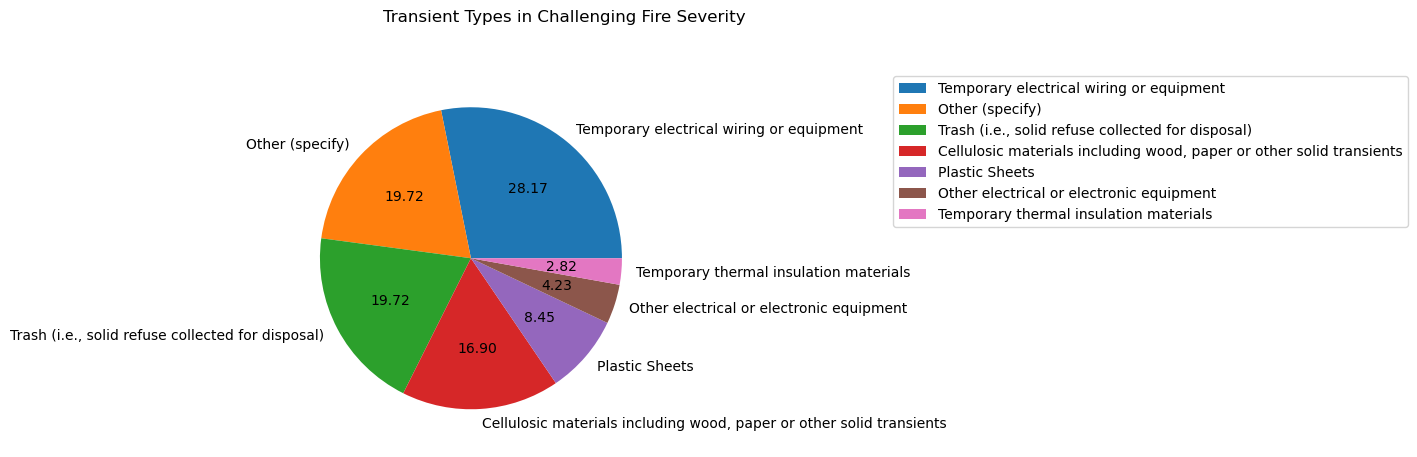

In [203]:
fig_tran = plt.figure(figsize=(5,5), dpi=100)
ax_tran = plt.subplot(111)
df_em_chal_transient['Type'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
fig_tran.suptitle('Transient Types in Challenging Fire Severity', fontsize=12, x = 0.7, y =1)
ax_tran.legend(bbox_to_anchor=(1.6, 1), fontsize = 10)
plt.show()
fig_tran.savefig(sys_plot + "Transient Types pie.png", bbox_inches='tight')

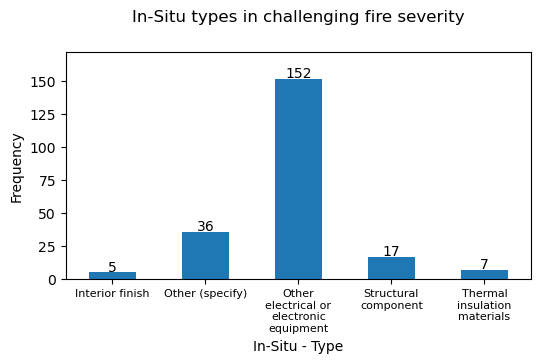

In [205]:
df_em_chal_insitu = df_em_challenging[df_em_challenging['Combustible Group'] == 'In_Situ']

xTickmarks = sorted(df_em_chal_insitu['Type'].dropna().unique().tolist())
xlabels = [ '\n'.join(wrap(l, 15)) for l in xTickmarks]

fig_insitu  = plt.figure(figsize=(6, 3), dpi = 100) 
axes_insitu = fig_insitu.add_subplot(111)
counts_insitu = df_em_chal_insitu['Type'].value_counts().sort_index(ascending=True)
counts_insitu.plot(kind='bar')

axes_insitu.set_ylim((0, np.max(counts_insitu)+20))
axes_insitu.set_xticklabels(xlabels, rotation = 0, fontsize = 8)
axes_insitu.set_title('In-Situ types in challenging fire severity', fontsize = 12, x=0.5, y = 1.1)
axes_insitu.set_ylabel('Frequency')
axes_insitu.set_xlabel('In-Situ - Type')
for i, d in enumerate(counts_insitu):
    plt.text(x=i , y =d+1 , s=f"{d}" , fontdict=dict(fontsize=10), ha = 'center')
plt.show()
fig_insitu.savefig(sys_plot + "In-situ types.png", bbox_inches='tight')

In [ ]:
fig_insitu = plt.figure(figsize=(5,5), dpi=100)
ax_insitu = plt.subplot(111)
df_em_chal_insitu['Type'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
fig_insitu.suptitle('Insitu Types in Challenging Fire Severity', fontsize=12, x = 0.7, y =0.95)
ax_insitu.legend(bbox_to_anchor=(1, 1), fontsize = 10)
plt.show()
fig_insitu.savefig(sys_plot + "Insitu Types pie.png", bbox_inches='tight')

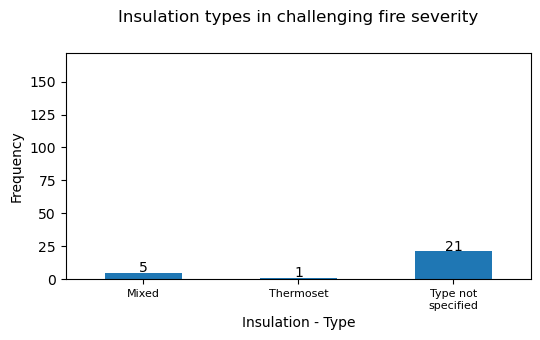

In [206]:
df_em_chal_ins = df_em_challenging[df_em_challenging['Combustible Group'] == 'Insulation']

xTickmarks = sorted(df_em_chal_ins['Type'].dropna().unique().tolist())
xlabels = [ '\n'.join(wrap(l, 15)) for l in xTickmarks]

fig_ins  = plt.figure(figsize=(6, 3), dpi = 100) 
axes_ins = fig_ins.add_subplot(111)
counts_ins = df_em_chal_ins['Type'].value_counts().sort_index(ascending=True)
counts_ins.plot(kind='bar')

axes_ins.set_ylim((0, np.max(counts_insitu)+20))
axes_ins.set_xticklabels(xlabels, rotation = 0, fontsize = 8)
axes_ins.set_title('Insulation types in challenging fire severity', fontsize = 12, x=0.5, y = 1.1)
axes_ins.set_ylabel('Frequency')
axes_ins.set_xlabel('Insulation - Type')
for i, d in enumerate(counts_ins):
    plt.text(x=i , y =d+1 , s=f"{d}" , fontdict=dict(fontsize=10), ha = 'center')
plt.show()
fig_ins.savefig(sys_plot + "Insulation types.png", bbox_inches='tight')

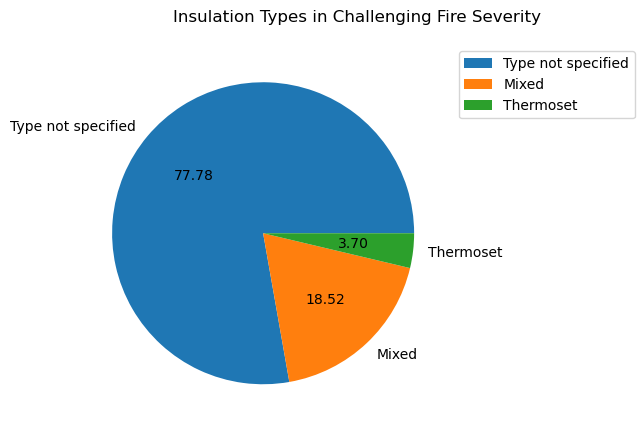

In [207]:
fig_ins = plt.figure(figsize=(5,5), dpi=100)
ax_ins = plt.subplot(111)
df_em_chal_ins['Type'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
fig_ins.suptitle('Insulation Types in Challenging Fire Severity', fontsize=12, x = 0.7, y =0.95)
ax_ins.legend(bbox_to_anchor=(1, 1), fontsize = 10)
plt.show()
fig_ins.savefig(sys_plot + "Insulation Types pie.png", bbox_inches='tight')

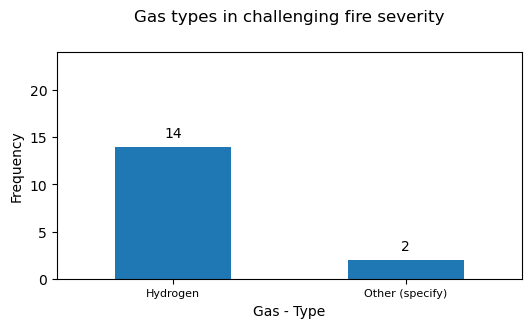

In [209]:
df_em_chal_gas = df_em_challenging[df_em_challenging['Combustible Group'] == 'Gas']

xTickmarks = sorted(df_em_chal_gas['Type'].dropna().unique().tolist())
xlabels = [ '\n'.join(wrap(l, 15)) for l in xTickmarks]

fig_gas  = plt.figure(figsize=(6, 3), dpi = 100) 
axes_gas = fig_gas.add_subplot(111)
counts_gas = df_em_chal_gas['Type'].value_counts().sort_index(ascending=True)
counts_gas.plot(kind='bar')

axes_gas.set_ylim((0, np.max(counts_gas)+10))
axes_gas.set_xticklabels(xlabels, rotation = 0, fontsize = 8)
axes_gas.set_title('Gas types in challenging fire severity', fontsize = 12, x=0.5, y = 1.1)
axes_gas.set_ylabel('Frequency')
axes_gas.set_xlabel('Gas - Type')
for i, d in enumerate(counts_gas):
    plt.text(x=i , y =d+1 , s=f"{d}" , fontdict=dict(fontsize=10), ha = 'center')
plt.show()
fig_gas.savefig(sys_plot + "Gas types.png", bbox_inches='tight')

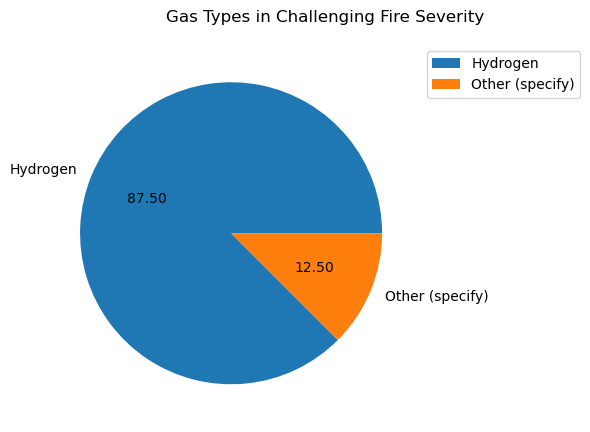

In [210]:
fig_gas = plt.figure(figsize=(5,5), dpi=100)
ax_gas = plt.subplot(111)
df_em_chal_gas['Type'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
fig_gas.suptitle('Gas Types in Challenging Fire Severity', fontsize=12, x = 0.7, y =0.95)
ax_gas.legend(bbox_to_anchor=(1, 1), fontsize = 10)
plt.show()
fig_gas.savefig(sys_plot + "Gas Types pie.png", bbox_inches='tight')

In [212]:
df_epri_merge.groupby(['Combustible Group'])['Form'].value_counts()

Combustible Group  Form                                          
Gas                Jet from a pressurized source                     14
                   Pressurized in a container                        14
                   Other (Specify)                                    6
                   Ambient pressure, within a component               3
                   Ambient pressure, within a compartment             1
                   Confined liquid spill                              1
In_Situ            Other (Specify)                                    4
                   Leak ‐ Oil soaked Insulation                       3
                   Single Cable                                       3
                    N/A                                               1
                   Contained within reservoir                         1
                   Pressurized in a container                         1
                   Spill confined by curbs or other physical feat     

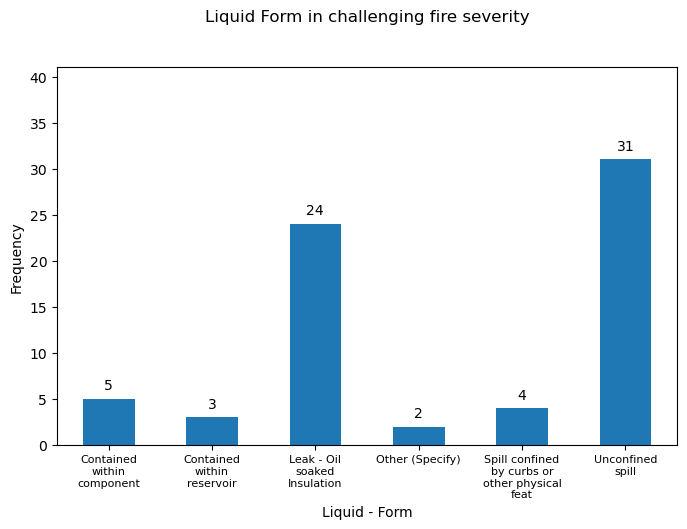

In [213]:
df_em_chal_liquid = df_em_challenging[df_em_challenging['Combustible Group'] == 'Liquid']

xTickmarks = sorted(df_em_chal_liquid['Form'].dropna().unique().tolist())
xlabels = [ '\n'.join(wrap(l, 15)) for l in xTickmarks]

fig_chal  = plt.figure(figsize=(8, 5), dpi = 100) 
axes_chal = fig_chal.add_subplot(111)
counts_liq = df_em_chal_liquid['Form'].value_counts().sort_index(ascending=True)
counts_liq.plot(kind='bar')

axes_chal.set_ylim((0, np.max(counts_liq)+10))
axes_chal.set_xticklabels(xlabels, rotation = 0, fontsize = 8)
axes_chal.set_title('Liquid Form in challenging fire severity', fontsize = 12, x=0.5, y = 1.1)
axes_chal.set_ylabel('Frequency')
axes_chal.set_xlabel('Liquid - Form')

for i, d in enumerate(counts_liq):
    plt.text(x=i , y =d+1 , s=f"{d}" , fontdict=dict(fontsize=10), ha = 'center')
    
plt.show()
fig_chal.savefig(sys_plot + "Liquid form.png", bbox_inches='tight')

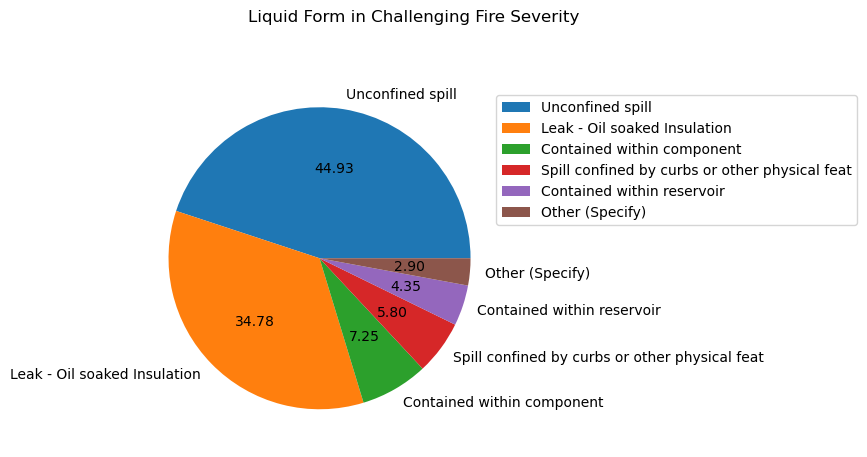

In [214]:
fig_liq = plt.figure(figsize=(5,5), dpi=100)
ax_liq = plt.subplot(111)
df_em_chal_liquid['Form'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
#plt.legend(loc='upper left')
fig_liq.suptitle('Liquid Form in Challenging Fire Severity', fontsize=12, x = 0.7, y =1)
ax_liq.legend(bbox_to_anchor=(0.95, 0.95), fontsize = 10)
plt.show()
fig_liq.savefig(sys_plot + "Liquid Forms pie.png", bbox_inches='tight')

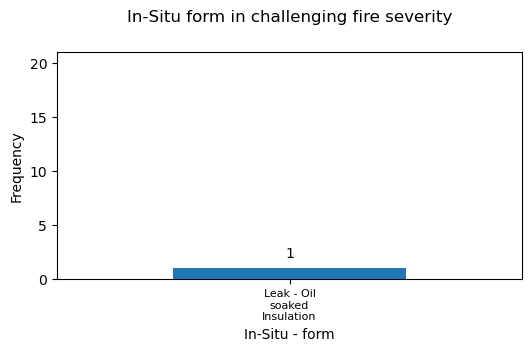

In [216]:
df_em_chal_insitu = df_em_challenging[df_em_challenging['Combustible Group'] == 'In_Situ']

xTickmarks = sorted(df_em_chal_insitu['Form'].dropna().unique().tolist())
xlabels = [ '\n'.join(wrap(l, 15)) for l in xTickmarks]

fig_insitu  = plt.figure(figsize=(6, 3), dpi = 100) 
axes_insitu = fig_insitu.add_subplot(111)
counts_insitu = df_em_chal_insitu['Form'].value_counts().sort_index(ascending=True)
counts_insitu.plot(kind='bar')

axes_insitu.set_ylim((0, np.max(counts_insitu)+20))
axes_insitu.set_xticklabels(xlabels, rotation = 0, fontsize = 8)
axes_insitu.set_title('In-Situ form in challenging fire severity', fontsize = 12, x=0.5, y = 1.1)
axes_insitu.set_ylabel('Frequency')
axes_insitu.set_xlabel('In-Situ - form')
for i, d in enumerate(counts_insitu):
    plt.text(x=i , y =d+1 , s=f"{d}" , fontdict=dict(fontsize=10), ha = 'center')
plt.show()
fig_insitu.savefig(sys_plot + "In-situ form.png", bbox_inches='tight')

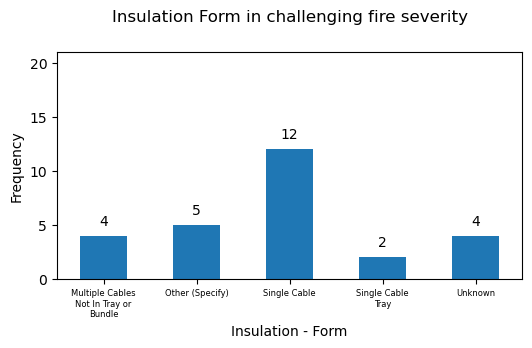

In [217]:
df_em_chal_ins = df_em_challenging[df_em_challenging['Combustible Group'] == 'Insulation']

xTickmarks = sorted(df_em_chal_ins['Form'].dropna().unique().tolist())
xlabels = [ '\n'.join(wrap(l, 15)) for l in xTickmarks]

fig_ins  = plt.figure(figsize=(6, 3), dpi = 100) 
axes_ins = fig_ins.add_subplot(111)
counts_ins = df_em_chal_ins['Form'].value_counts().sort_index(ascending=True)
counts_ins.plot(kind='bar')

axes_ins.set_ylim((0, np.max(counts_insitu)+20))
axes_ins.set_xticklabels(xlabels, rotation = 0, fontsize = 6)
axes_ins.set_title('Insulation Form in challenging fire severity', fontsize = 12, x=0.5, y = 1.1)
axes_ins.set_ylabel('Frequency')
axes_ins.set_xlabel('Insulation - Form')
for i, d in enumerate(counts_ins):
    plt.text(x=i , y =d+1 , s=f"{d}" , fontdict=dict(fontsize=10), ha = 'center')
plt.show()
fig_ins.savefig(sys_plot + "Insulation form.png", bbox_inches='tight')

In [ ]:
fig_ins = plt.figure(figsize=(5,5), dpi=100)
ax_ins = plt.subplot(111)
df_em_chal_ins['Form'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
fig_ins.suptitle('Insulation Form in Challenging Fire Severity', fontsize=12, x = 0.7, y =0.95)
ax_ins.legend(bbox_to_anchor=(1, 1), fontsize = 10)
plt.show()
fig_ins.savefig(sys_plot + "Insulation Form pie.png", bbox_inches='tight')

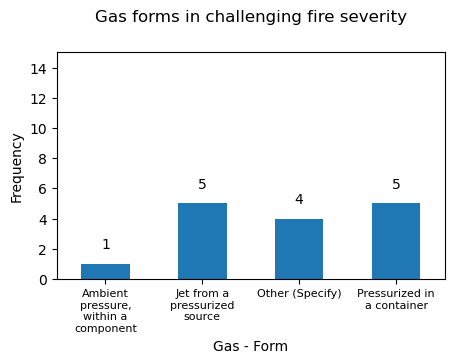

In [218]:
df_em_chal_gas = df_em_challenging[df_em_challenging['Combustible Group'] == 'Gas']

xTickmarks = sorted(df_em_chal_gas['Form'].dropna().unique().tolist())
xlabels = [ '\n'.join(wrap(l, 15)) for l in xTickmarks]

fig_gas  = plt.figure(figsize=(5, 3), dpi = 100) 
axes_gas = fig_gas.add_subplot(111)
counts_gas = df_em_chal_gas['Form'].value_counts().sort_index(ascending=True)
counts_gas.plot(kind='bar')

axes_gas.set_ylim((0, np.max(counts_gas)+10))
axes_gas.set_xticklabels(xlabels, rotation = 0, fontsize = 8)
axes_gas.set_title('Gas forms in challenging fire severity', fontsize = 12, x=0.5, y = 1.1)
axes_gas.set_ylabel('Frequency')
axes_gas.set_xlabel('Gas - Form')
for i, d in enumerate(counts_gas):
    plt.text(x=i , y =d+1 , s=f"{d}" , fontdict=dict(fontsize=10), ha = 'center')
plt.show()
fig_gas.savefig(sys_plot + "Gas form.png", bbox_inches='tight')

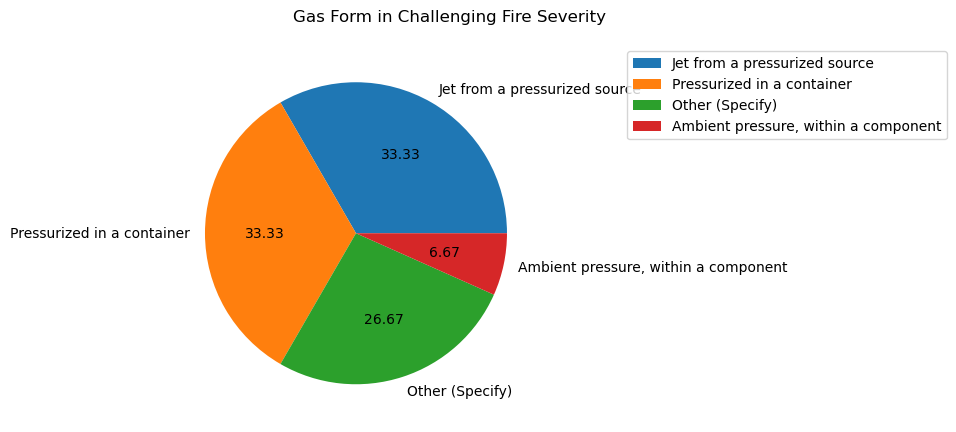

In [219]:
fig_gas = plt.figure(figsize=(5,5), dpi=100)
ax_gas = plt.subplot(111)
df_em_chal_gas['Form'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
fig_gas.suptitle('Gas Form in Challenging Fire Severity', fontsize=12, x = 0.7, y =0.95)
ax_gas.legend(bbox_to_anchor=(1.2, 1), fontsize = 10)
plt.show()
fig_gas.savefig(sys_plot + "Gas Form pie.png", bbox_inches='tight')

In [220]:
def correlation_plot1(group1, group2, siz_x, siz_y):
    df_em_gpft = df_epri_merge[[group1, group2]].reset_index(drop = True)
    df_em_gpft = pd.DataFrame(df_em_gpft)
    counts = df_em_gpft.groupby([group1, group2])[group2].count()

    x_list = counts.index.get_level_values(0).tolist()
    y_list = counts.index.get_level_values(1).tolist()
    s      = [6*n for n in counts.values]
    s_c    = [n for n in counts.values]


    xTickmarks = sorted(df_epri_merge[group2].dropna().unique().tolist())
    yTickmarks = sorted(df_epri_merge[group1].dropna().unique().tolist())

    x = [yTickmarks.index(i) for i in x_list]
    y = [xTickmarks.index(i) for i in y_list]
    
    xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
    ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

    matplotlib.rc('font', serif='Helvetica Neue')
    matplotlib.rc('text', usetex='false')
    matplotlib.rcParams.update({'font.size': 10})
    fig = plt.figure(figsize=(siz_x, siz_y), dpi = 100) # for landscape
    axes1 = fig.add_subplot(111)
    title = '%s - %s' %(group1, group2)
    save  = '%s - %s.png' %(group1, group2)

    plt.scatter(x, y, s = s, c = s_c)
    cb = plt.colorbar()
    cb.set_label('Frequency', fontsize=14)
    
    axes1.tick_params(axis='both', which='major', pad=10)
    axes1.set_xlim((-1, len(yTickmarks)))
    axes1.set_ylim((-1, len(xTickmarks)))
    axes1.set_xticks(xrange(len(yTickmarks)))
    axes1.set_yticks(xrange(len(xTickmarks)))
    axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 12)
    axes1.set_yticklabels(xlabels, fontsize = 12)
    axes1.set_ylabel(group2, fontsize = 14)
    axes1.set_xlabel(group1, fontsize = 14)
    axes1.legend(prop={'size':5}, ncol=4)
    axes1.xaxis.grid(True)
    axes1.set_title(title, fontsize = 15, x=0.5, y = 1.0)

    plt.show()
    fig.savefig(sys_plot + save, bbox_inches='tight')
    #fig.savefig(save, bbox_inches='tight')

# Gas (Form-Type)

No handles with labels found to put in legend.


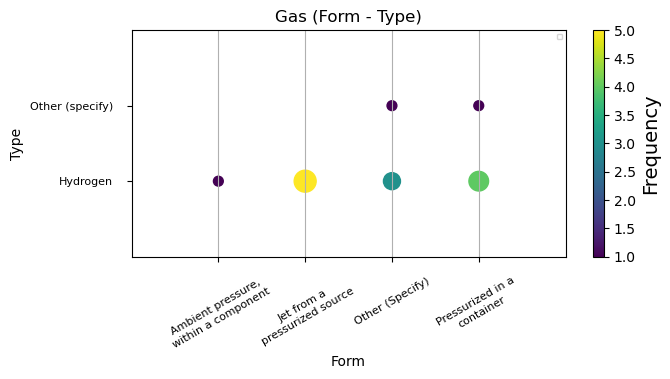

In [221]:
# df_em_challenging[df_em_challenging['Group'] == 'In_Situ']
# df_em_gpft = df_epri_merge[[group1, group2]].reset_index(drop = True)
# df_em_gpft = pd.DataFrame(df_em_gpft)
# counts = df_em_gpft.groupby([group1, group2])[group2].count()

df_em_gpft = df_em_chal_gas[['Form', 'Type']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Form', 'Type'])['Type'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_em_chal_gas['Type'].dropna().unique().tolist())
yTickmarks = sorted(df_em_chal_gas['Form'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(7, 3), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Frequency', fontsize=14)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Type', fontsize = 10)
axes1.set_xlabel('Form', fontsize = 10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Gas (Form - Type)', fontsize = 12, x=0.5, y = 1.0)

plt.show()
fig.savefig(sys_plot + 'Gas (Form - Type)', bbox_inches='tight')

No handles with labels found to put in legend.


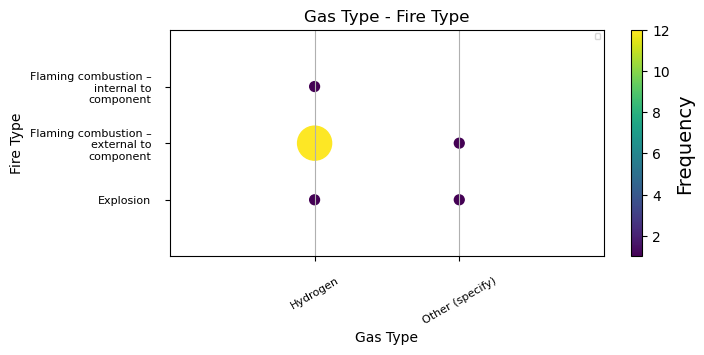

In [234]:
# df_em_challenging[df_em_challenging['Group'] == 'In_Situ']
# df_em_gpft = df_epri_merge[[group1, group2]].reset_index(drop = True)
# df_em_gpft = pd.DataFrame(df_em_gpft)
# counts = df_em_gpft.groupby([group1, group2])[group2].count()

df_em_gpft = df_em_chal_gas[['Type', 'Fire Type']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Fire Type'])['Fire Type'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_em_chal_gas['Type'].dropna().unique().tolist())
yTickmarks = sorted(df_em_chal_gas['Fire Type'].dropna().unique().tolist())

x = [xTickmarks.index(i) for i in x_list]
y = [yTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(7, 3), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Frequency', fontsize=14)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(xTickmarks)))
axes1.set_ylim((-1, len(yTickmarks)))
axes1.set_xticks(xrange(len(xTickmarks)))
axes1.set_yticks(xrange(len(yTickmarks)))
axes1.set_xticklabels(xlabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(ylabels, fontsize = 8)
axes1.set_ylabel('Fire Type', fontsize = 10)
axes1.set_xlabel('Gas Type', fontsize = 10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Gas Type - Fire Type', fontsize = 12, x=0.5, y = 1.0)

plt.show()
fig.savefig(sys_plot + 'Gas Type - Fire Type', bbox_inches='tight')

No handles with labels found to put in legend.


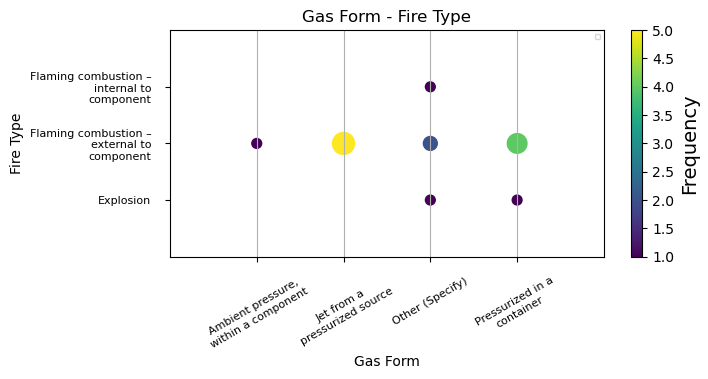

In [235]:
# df_em_challenging[df_em_challenging['Group'] == 'In_Situ']
# df_em_gpft = df_epri_merge[[group1, group2]].reset_index(drop = True)
# df_em_gpft = pd.DataFrame(df_em_gpft)
# counts = df_em_gpft.groupby([group1, group2])[group2].count()

df_em_gpft = df_em_chal_gas[['Form', 'Fire Type']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Form', 'Fire Type'])['Fire Type'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_em_chal_gas['Form'].dropna().unique().tolist())
yTickmarks = sorted(df_em_chal_gas['Fire Type'].dropna().unique().tolist())

x = [xTickmarks.index(i) for i in x_list]
y = [yTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(7, 3), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Frequency', fontsize=14)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(xTickmarks)))
axes1.set_ylim((-1, len(yTickmarks)))
axes1.set_xticks(xrange(len(xTickmarks)))
axes1.set_yticks(xrange(len(yTickmarks)))
axes1.set_xticklabels(xlabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(ylabels, fontsize = 8)
axes1.set_ylabel('Fire Type', fontsize = 10)
axes1.set_xlabel('Gas Form', fontsize = 10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Gas Form - Fire Type', fontsize = 12, x=0.5, y = 1.0)

plt.show()
fig.savefig(sys_plot + 'Gas Form - Fire Type', bbox_inches='tight')

In [240]:
df_em_chal_gas = df_em_challenging[df_em_challenging['Combustible Group'] == 'Gas']
df_em_chal_gas_turbine = df_em_chal_gas[df_em_chal_gas['Building'] == 'Turbine Building']

No handles with labels found to put in legend.


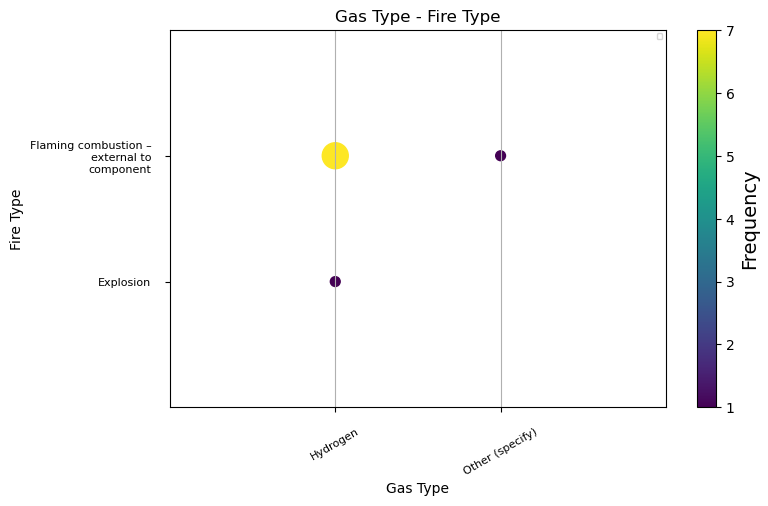

In [244]:
# df_em_challenging[df_em_challenging['Group'] == 'In_Situ']
# df_em_gpft = df_epri_merge[[group1, group2]].reset_index(drop = True)
# df_em_gpft = pd.DataFrame(df_em_gpft)
# counts = df_em_gpft.groupby([group1, group2])[group2].count()

df_em_gpft = df_em_chal_gas_turbine[['Type', 'Fire Type']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Fire Type'])['Fire Type'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_em_chal_gas_turbine['Type'].dropna().unique().tolist())
yTickmarks = sorted(df_em_chal_gas_turbine['Fire Type'].dropna().unique().tolist())

x = [xTickmarks.index(i) for i in x_list]
y = [yTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(8, 5), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Frequency', fontsize=14)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(xTickmarks)))
axes1.set_ylim((-1, len(yTickmarks)))
axes1.set_xticks(xrange(len(xTickmarks)))
axes1.set_yticks(xrange(len(yTickmarks)))
axes1.set_xticklabels(xlabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(ylabels, fontsize = 8)
axes1.set_ylabel('Fire Type', fontsize = 10)
axes1.set_xlabel('Gas Type', fontsize = 10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Gas Type - Fire Type', fontsize = 12, x=0.5, y = 1.0)

plt.show()
fig.savefig(sys_plot + 'Gas Type - Fire Type', bbox_inches='tight')

In [245]:
counts

Type             Fire Type                                 
Hydrogen         Explosion                                     1
                 Flaming combustion – external to component    7
Other (specify)  Flaming combustion – external to component    1
Name: Fire Type, dtype: int64

In [ ]:
# df_em_challenging[df_em_challenging['Group'] == 'In_Situ']
# df_em_gpft = df_epri_merge[[group1, group2]].reset_index(drop = True)
# df_em_gpft = pd.DataFrame(df_em_gpft)
# counts = df_em_gpft.groupby([group1, group2])[group2].count()

df_em_gpft = df_em_chal_gas[['Form', 'Building']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Form', 'Building'])['Building'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_em_chal_gas['Building'].dropna().unique().tolist())
yTickmarks = sorted(df_em_chal_gas['Form'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(7, 3), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Frequency', fontsize=14)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Building', fontsize = 10)
axes1.set_xlabel('Form', fontsize = 10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Gas (Form - Building)', fontsize = 12, x=0.5, y = 1.0)

plt.show()
fig.savefig(sys_plot + 'Gas (Form - Building)', bbox_inches='tight')

In [228]:
counts

Type             Fire Type                                 
Hydrogen         Explosion                                      1
                 Flaming combustion – external to component    12
                 Flaming combustion – internal to component     1
Other (specify)  Explosion                                      1
                 Flaming combustion – external to component     1
Name: Fire Type, dtype: int64

# Insulation (Form-Type)

In [ ]:
# df_em_challenging[df_em_challenging['Group'] == 'In_Situ']
# df_em_gpft = df_epri_merge[[group1, group2]].reset_index(drop = True)
# df_em_gpft = pd.DataFrame(df_em_gpft)
# counts = df_em_gpft.groupby([group1, group2])[group2].count()

df_em_gpft = df_em_chal_ins[['Form', 'Type']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Form', 'Type'])['Type'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_em_chal_ins['Type'].dropna().unique().tolist())
yTickmarks = sorted(df_em_chal_ins['Form'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(7, 3), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Frequency', fontsize=14)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Type', fontsize = 10)
axes1.set_xlabel('Form', fontsize = 10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Insulation (Form - Type)', fontsize = 12, x=0.5, y = 1.0)

plt.show()
fig.savefig(sys_plot + 'Insulation (Form - Type)', bbox_inches='tight')

In [ ]:
# df_em_challenging[df_em_challenging['Group'] == 'In_Situ']
# df_em_gpft = df_epri_merge[[group1, group2]].reset_index(drop = True)
# df_em_gpft = pd.DataFrame(df_em_gpft)
# counts = df_em_gpft.groupby([group1, group2])[group2].count()

df_em_gpft = df_em_chal_ins[['Form', 'Building']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Form', 'Building'])['Building'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [100*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_em_chal_ins['Building'].dropna().unique().tolist())
yTickmarks = sorted(df_em_chal_ins['Form'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(7, 5), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Frequency', fontsize=14)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Building', fontsize = 10)
axes1.set_xlabel('Form', fontsize = 10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Insulation (Form - Building)', fontsize = 12, x=0.5, y = 1.0)

plt.show()
fig.savefig(sys_plot + 'Insulation (Form - Building)', bbox_inches='tight')

# Liquid (Form-Type)

In [ ]:
# df_em_challenging[df_em_challenging['Group'] == 'In_Situ']
# df_em_gpft = df_epri_merge[[group1, group2]].reset_index(drop = True)
# df_em_gpft = pd.DataFrame(df_em_gpft)
# counts = df_em_gpft.groupby([group1, group2])[group2].count()

df_em_gpft = df_em_chal_liquid[['Form', 'Type']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Form', 'Type'])['Type'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_em_chal_liquid['Type'].dropna().unique().tolist())
yTickmarks = sorted(df_em_chal_liquid['Form'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(8, 3), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar(format='%.0f')
cb.set_label('Frequency', fontsize=14)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Type', fontsize = 10)
axes1.set_xlabel('Form', fontsize = 10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Liquid (Form - Type)', fontsize = 12, x=0.5, y = 1.0)

plt.show()
fig.savefig(sys_plot + 'Liquid (Form - Type)', bbox_inches='tight')

In [ ]:
# df_em_challenging[df_em_challenging['Group'] == 'In_Situ']
# df_em_gpft = df_epri_merge[[group1, group2]].reset_index(drop = True)
# df_em_gpft = pd.DataFrame(df_em_gpft)
# counts = df_em_gpft.groupby([group1, group2])[group2].count()

df_em_gpft = df_em_chal_liquid[['Form', 'Building']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Form', 'Building'])['Building'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_em_chal_liquid['Building'].dropna().unique().tolist())
yTickmarks = sorted(df_em_chal_liquid['Form'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(9, 5), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar(format='%.0f')
cb.set_label('Frequency', fontsize=14)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Building', fontsize = 10)
axes1.set_xlabel('Form', fontsize = 10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Liquid (Form - Building)', fontsize = 12, x=0.5, y = 1.0)

plt.show()
fig.savefig(sys_plot + 'Liquid (Form - Building)', bbox_inches='tight')

# Transient (Type-Building)

In [ ]:
# df_em_challenging[df_em_challenging['Group'] == 'In_Situ']
# df_em_gpft = df_epri_merge[[group1, group2]].reset_index(drop = True)
# df_em_gpft = pd.DataFrame(df_em_gpft)
# counts = df_em_gpft.groupby([group1, group2])[group2].count()

df_em_gpft = df_em_chal_transient[['Type', 'Building']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Building'])['Building'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_em_chal_transient['Building'].dropna().unique().tolist())
yTickmarks = sorted(df_em_chal_transient['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(12, 5), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar(format='%.0f')
cb.set_label('Frequency', fontsize=14)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Building', fontsize = 10)
axes1.set_xlabel('Form', fontsize = 10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Transient (Type - Building)', fontsize = 12, x=0.5, y = 1.0)

plt.show()
fig.savefig(sys_plot + 'Transient (Type - Building)', bbox_inches='tight')

# In-Situ (Type - Building)

In [ ]:
# df_em_challenging[df_em_challenging['Group'] == 'In_Situ']
# df_em_gpft = df_epri_merge[[group1, group2]].reset_index(drop = True)
# df_em_gpft = pd.DataFrame(df_em_gpft)
# counts = df_em_gpft.groupby([group1, group2])[group2].count()

df_em_gpft = df_em_chal_insitu[['Type', 'Building']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Building'])['Building'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [15*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_em_chal_insitu['Building'].dropna().unique().tolist())
yTickmarks = sorted(df_em_chal_insitu['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(12, 5), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar(format='%.0f')
cb.set_label('Frequency', fontsize=14)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Building', fontsize = 10)
axes1.set_xlabel('Type', fontsize = 10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Insitu (Type - Building)', fontsize = 12, x=0.5, y = 1.0)

plt.show()
fig.savefig(sys_plot + 'Insitu (Type - Building)', bbox_inches='tight')

In [ ]:
df_epri_merge['Type'].value_counts()

In [ ]:
#df_em_chal_liquid['Type'].value_counts().plot(kind='bar')

In [ ]:
df_em_chal_liquid['Type'].value_counts().sort_index(ascending=True)

In [ ]:
correlation_plot('Form', 'Disposition1', 35, 5)

In [ ]:
# Plant Area - Disposition

In [ ]:
correlation_plot('Plant Area', 'Disposition_FES', 18, 12)

In [ ]:
correlation_plot('Building', 'Disposition_FES', 18, 12)

In [ ]:

bchal = df_epri_merge.groupby(['Building'])['Disposition1'].value_counts()
fig_md = bchal.unstack().plot(kind='bar', stacked = True)
ax = fig_md.add_subplot(111)
# xTickmarks = sorted(df_epri_merge['Building'].dropna().unique().tolist())  
# xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
# axes_bd.set_xticklabels(xlabels, rotation = 30, fontsize = 8)
# axes_bd.set_xlabel('Building', fontsize = 10)
# axes_bd.legend(prop={'size':5}, ncol=4)
# axes_bd.set_title('Insitu (Type - Building)', fontsize = 12, x=0.5, y = 1.0)

plt.show()

In [ ]:
bchal = df_epri_merge.groupby(['Building'])['Disposition1'].value_counts()
ax = bchal.unstack().plot(kind='bar', stacked = True, figsize=(12, 5))
plt.title('xx')
ax.set_xticklabels(xlabels, rotation = 30, fontsize = 8)
ax.set_xlabel('Building', fontsize = 14)
# ax.legend(prop={'size':10}, ncol=4)
ax.set_title('Building - Disposition', fontsize = 16, x=0.5, y = 1.2)
plt.show

In [ ]:
bchal = df_epri_merge.groupby(['Building'])['Disposition'].value_counts()
ax = bchal.unstack().plot(kind='bar', stacked = True, figsize=(20, 5))
plt.title('xx')
ax.set_xticklabels(xlabels, rotation = 30, fontsize = 12)
ax.set_xlabel('Building', fontsize = 16)
ax.legend(prop={'size':10}, ncol=4)
ax.set_title('Building - Disposition', fontsize = 16, x=0.5, y = 1.2)
plt.show

In [ ]:
bchal = df_epri_merge.groupby(['year'])['Disposition1'].value_counts()
ax = bchal.unstack().plot(kind='bar', stacked = True, figsize=(20, 5))
plt.title('xx')
#ax.set_xticklabels(xlabels, rotation = 30, fontsize = 12)
ax.set_xlabel('year', fontsize = 16)
ax.legend(prop={'size':10}, ncol=4)
ax.set_title('Year - Disposition', fontsize = 16, x=0.5, y = 1.2)
plt.show

In [ ]:
# df_em_challenging[df_em_challenging['Group'] == 'In_Situ']
# df_em_gpft = df_epri_merge[[group1, group2]].reset_index(drop = True)
# df_em_gpft = pd.DataFrame(df_em_gpft)
# counts = df_em_gpft.groupby([group1, group2])[group2].count()

df_em_gpft = df_epri_merge[['year', 'Building']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['year', 'Building'])['Building'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [10*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_epri_merge['year'].dropna().unique().tolist())
yTickmarks = sorted(df_epri_merge['Building'].dropna().unique().tolist())

x = [xTickmarks.index(i) for i in x_list]
y = [yTickmarks.index(i) for i in y_list]
    
xlabels = [l for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(15, 5), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar(format='%.0f')
cb.set_label('Number of Fire Events', fontsize=14)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(xTickmarks)))
axes1.set_ylim((-1, len(yTickmarks)))
axes1.set_xticks(xrange(len(xTickmarks)))
axes1.set_yticks(xrange(len(yTickmarks)))
axes1.set_xticklabels(xlabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(ylabels, fontsize = 8)
axes1.set_ylabel('Building', fontsize = 10)
axes1.set_xlabel('year', fontsize = 10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Liquid (Form - Building)', fontsize = 12, x=0.5, y = 1.0)

plt.show()
fig.savefig(sys_plot + 'Liquid (Form - Building)', bbox_inches='tight')

In [ ]:
df_em_gpft.groupby(['year', 'Building'])['Building'].count()
print(x_list)
print(xTickmarks)
print(y_list)
print(x)

In [248]:
df_epri_merge['Duration']

FireID
1.0     34.0
2.0     14.0
3.0    409.0
4.0      NaN
5.0    173.0
       ...  
NaN      NaN
NaN      NaN
NaN      NaN
NaN      NaN
NaN      NaN
Name: Duration, Length: 2205, dtype: float64

# References

1. Baranowsky, P., & Facemire, J. (2013). The updated fire events database: description of content and fire event classification guidance. Electric Power Research Institute, Palo Alto, CA.